In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/engage-2-value-from-clicks-to-conversions/sample_submission.csv
/kaggle/input/engage-2-value-from-clicks-to-conversions/train_data.csv
/kaggle/input/engage-2-value-from-clicks-to-conversions/test_data.csv
/kaggle/input/submission-csv/submission.csv


In [2]:
#import pandas as pd
#df = pd.read_csv("/kaggle/input/engage-2-value-from-clicks-to-conversions/train_data.csv") 
#X = df.drop("purchaseValue", axis=1) 
#y = df['purchaseValue'] 
#from sklearn.dummy import DummyRegressor 
#model = DummyRegressor().fit(X,y) 
#X_test = pd.read_csv("/kaggle/input/engage-2-value-from-clicks-to-conversions/test_data.csv") 
#y_pred=model.predict(X_test) 

In [3]:
#submission = pd.DataFrame({"id": range(0,X_test.shape[0]), "purchaseValue": y_pred}) 
#submission.to_csv('submission.csv',index=False)

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
train_df = pd.read_csv('/kaggle/input/engage-2-value-from-clicks-to-conversions/train_data.csv')
test_df = pd.read_csv('/kaggle/input/engage-2-value-from-clicks-to-conversions/test_data.csv')

In [5]:
#train_df.columns

In [6]:
#test_df.columns

In [7]:
#test_df.info()

In [8]:
#train_df.describe()

In [9]:
#test_df.describe()

User & Session Metadata 
| Column          | Description                                          |
| --------------- | ---------------------------------------------------- |
| `userId`        | Unique ID for the user                               |
| `sessionId`     | Unique ID for a session (group of user interactions) |
| `sessionNumber` | The nth session for the user                         |
| `sessionStart`  | Timestamp (or similar) marking session start         |


* Missing Values
* Explore Numerical data
* Explore Categorical data
* Find the relationship between variables
  

In [10]:
#train_df.head()

In [11]:
#train_df[['trafficSource.keyword','trafficSource.isTrueDirect','trafficSource.referralPath']]

In [12]:
#train_df.isnull().sum()

In [13]:
#train_df.shape


In [14]:
#test_df.isnull().sum()

In [15]:
#[features for features in train_df.columns if train_df[features].isnull().sum()>0]

In [16]:
#[features for features in test_df.columns if test_df[features].isnull().sum()>0]

In [17]:
# missing_counts = test_df.isnull().sum()
# missing_counts = missing_counts[missing_counts > 0].sort_values(ascending=False)
# print(missing_counts)


In [18]:
 train_df.isna().mean().sort_values(ascending=False) 

trafficSource.adContent                         0.974462
trafficSource.adwordsClickInfo.slot             0.963102
trafficSource.adwordsClickInfo.adNetworkType    0.963102
trafficSource.adwordsClickInfo.isVideoAd        0.963102
trafficSource.adwordsClickInfo.page             0.963102
trafficSource.referralPath                      0.631849
trafficSource.isTrueDirect                      0.630332
trafficSource.keyword                           0.619369
totals.bounces                                  0.593632
new_visits                                      0.306017
pageViews                                       0.000069
device.screenResolution                         0.000000
trafficSource.campaign                          0.000000
browser                                         0.000000
purchaseValue                                   0.000000
screenSize                                      0.000000
geoCluster                                      0.000000
device.mobileDeviceBranding    

In [19]:
# missing_counts = train_df.isnull().sum()
# missing_counts = missing_counts[missing_counts > 0].sort_values(ascending=False)
# print(missing_counts)


In [20]:
# List of sparse columns to drop
sparse_cols_to_drop = [
    'trafficSource.adContent',
    'trafficSource.adwordsClickInfo.slot',
    'trafficSource.adwordsClickInfo.isVideoAd',
    'trafficSource.adwordsClickInfo.adNetworkType',
    'trafficSource.adwordsClickInfo.page'
       
]

# Drop from train set
train_df.drop(columns=sparse_cols_to_drop, inplace=True)

# If you have test_df as well, drop from it too
test_df.drop(columns=sparse_cols_to_drop, inplace=True)


In [21]:
# Show columns with only 1 unique value
single_value_cols = [col for col in train_df.columns if train_df[col].nunique(dropna=False) == 1]

# Display result
print("Columns with only 1 unique value:")
print(single_value_cols)


Columns with only 1 unique value:
['device.screenResolution', 'screenSize', 'device.mobileDeviceBranding', 'device.mobileInputSelector', 'device.mobileDeviceMarketingName', 'device.operatingSystemVersion', 'device.flashVersion', 'totals.visits', 'geoNetwork.networkLocation', 'browserMajor', 'device.browserSize', 'socialEngagementType', 'locationZone', 'device.mobileDeviceModel', 'device.language', 'device.browserVersion', 'device.screenColors']


In [22]:
train_df.drop(columns=single_value_cols, inplace=True)


In [23]:
test_df.drop(columns=single_value_cols, inplace=True)

In [24]:
#train_df.info()

In [25]:
#train_df[['trafficSource.keyword','trafficSource.isTrueDirect','trafficSource.referralPath']]

In [26]:
#train_df['trafficSource.keyword'].value_counts()

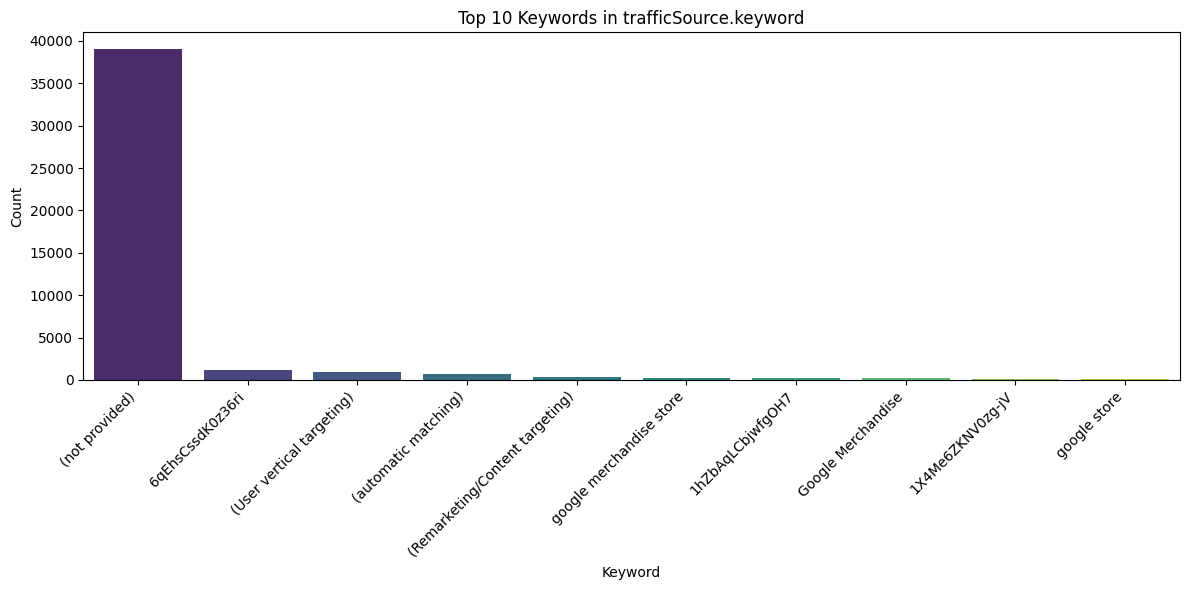

In [27]:
# Get top 10 keywords
top_keywords = train_df['trafficSource.keyword'].value_counts().head(10).reset_index()
top_keywords.columns = ['keyword', 'count']

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_keywords, x='keyword', y='count', palette='viridis')

plt.title('Top 10 Keywords in trafficSource.keyword')
plt.xlabel('Keyword')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [28]:
#train_df['trafficSource.keyword'].unique()

In [29]:
# # Step 1: Replace '(not provided)' and NaN with 'Others'
# train_df['trafficSource.keyword'] = train_df['trafficSource.keyword'].replace('(not provided)', 'Others')
# train_df['trafficSource.keyword'] = train_df['trafficSource.keyword'].fillna('Others')

# # Step 2: Count keyword frequencies after above replacement
# keyword_counts = train_df['trafficSource.keyword'].value_counts()

# # Step 3: Replace low-frequency keywords (<50) with 'Others'
# train_df['trafficSource.keyword'] = train_df['trafficSource.keyword'].apply(
#     lambda x: x if keyword_counts.get(x, 0) >= 50 else 'Others'
# )


In [30]:
# # Step 1: Replace '(not provided)' and NaN with 'Others' in test_df
# test_df['trafficSource.keyword'] = test_df['trafficSource.keyword'].replace('(not provided)', 'Others')
# test_df['trafficSource.keyword'] = test_df['trafficSource.keyword'].fillna('Others')

# # Step 2: Use the keyword_counts from train_df to replace low-frequency keywords with 'Others' in test_df
# test_df['trafficSource.keyword'] = test_df['trafficSource.keyword'].apply(
#     lambda x: x if keyword_counts.get(x, 0) >= 50 else 'Others'
# )


In [31]:
# final_counts = train_df['trafficSource.keyword'].value_counts().reset_index()
# final_counts.columns = ['keyword', 'count']

# # Plot
# plt.figure(figsize=(12, 6))
# sns.barplot(data=final_counts, x='keyword', y='count', palette='Set2')

# plt.title('trafficSource.keyword (Grouped with Others)')
# plt.xlabel('Keyword')
# plt.ylabel('Count')
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
# plt.show()

In [32]:
# final_counts = test_df['trafficSource.keyword'].value_counts().reset_index()
# final_counts.columns = ['keyword', 'count']

# # Plot
# plt.figure(figsize=(12, 6))
# sns.barplot(data=final_counts, x='keyword', y='count', palette='Set2')

# plt.title('trafficSource.keyword (Grouped with Others)')
# plt.xlabel('Keyword')
# plt.ylabel('Count')
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
# plt.show()

In [33]:
#train_df['trafficSource.keyword'].value_counts()

In [34]:
#train_df['trafficSource.keyword'].value_counts()

In [35]:
# train_df['trafficSource.keyword'] = train_df['trafficSource.keyword'].fillna('unknown')
# train_df['trafficSource.isTrueDirect'] = train_df['trafficSource.isTrueDirect'].fillna('unknown')
# train_df['trafficSource.referralPath'] = train_df['trafficSource.referralPath'].fillna('unknown')

In [36]:
#train_df['trafficSource.isTrueDirect'].unique()

In [37]:
train_df['trafficSource.isTrueDirect'] = (
    train_df['trafficSource.isTrueDirect']
    .astype('boolean')  # nullable boolean type
    .fillna(False)
    .astype(bool)
    .astype(int)
)

In [38]:
test_df['trafficSource.isTrueDirect'] = (
    test_df['trafficSource.isTrueDirect']
    .astype('boolean')  # nullable boolean type
    .fillna(False)
    .astype(bool)
    .astype(int)
)

In [39]:
#train_df['trafficSource.isTrueDirect'].unique()

In [40]:
#test_df['trafficSource.isTrueDirect'].unique()

In [41]:
#test_df['trafficSource.isTrueDirect'].value_counts()

In [42]:
#train_df['trafficSource.referralPath'].unique()

In [43]:
#train_df['trafficSource.referralPath'].value_counts()

In [44]:
# # Set threshold
# min_count = 50
# train_df['trafficSource.referralPath'] = train_df['trafficSource.referralPath'].replace('(not provided)', 'Others')
# train_df['trafficSource.referralPath'] = train_df['trafficSource.referralPath'].fillna('Others')
# # Get counts
# referral_counts = train_df['trafficSource.referralPath'].value_counts()

# # Referral paths with counts >= min_count
# valid_referrals = referral_counts[referral_counts >= min_count].index

# # Replace low-frequency referral paths with 'Others'
# train_df['trafficSource.referralPath'] = train_df['trafficSource.referralPath'].apply(
#     lambda x: x if x in valid_referrals else 'Others'
# )


In [45]:
# # Fill NaNs in test_df
# test_df['trafficSource.referralPath'] = test_df['trafficSource.referralPath'].fillna('Others')

# # Replace low-frequency referral paths in test_df using valid_referrals from train_df
# test_df['trafficSource.referralPath'] = test_df['trafficSource.referralPath'].apply(
#     lambda x: x if x in valid_referrals else 'Others'
# )


In [46]:
#train_df['trafficSource.referralPath'].value_counts()

In [47]:
#test_df['trafficSource.referralPath'].value_counts()

In [48]:
#train_df[['trafficSource.referralPath']].isnull().sum()

In [49]:
train_df['totals.bounces']=train_df['totals.bounces'].fillna(0).astype(int)
train_df['new_visits']=train_df['new_visits'].fillna(0).astype(int)

In [50]:
#train_df['totals.bounces'].unique()

In [51]:
#train_df['new_visits'].unique()

In [52]:
test_df['totals.bounces']=test_df['totals.bounces'].fillna(0).astype(int)
test_df['new_visits']=test_df['new_visits'].fillna(0).astype(int)

In [53]:
#test_df['new_visits'].unique()

In [54]:
train_df['pageViews']=train_df['pageViews'].fillna(train_df['pageViews'].median())


In [55]:
test_df['pageViews']=test_df['pageViews'].fillna(test_df['pageViews'].median())

In [56]:
#train_df.isnull().sum()

In [57]:
#test_df.isnull().sum()

In [58]:
#train_df.info()

In [59]:
#test_df.info()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


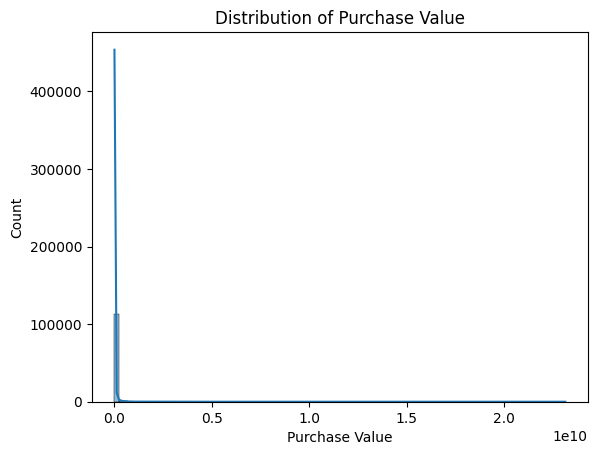

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=train_df, x='purchaseValue', bins=100, kde=True)
plt.title('Distribution of Purchase Value')
plt.xlabel('Purchase Value')
plt.ylabel('Count')
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


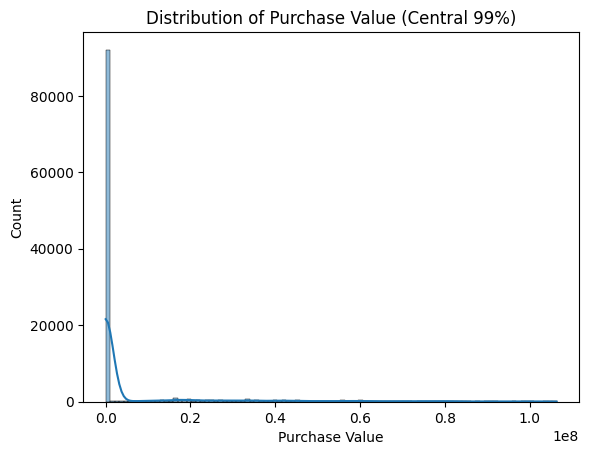

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calculate 0.5 and 99.5 percentiles
lower_bound = np.percentile(train_df['purchaseValue'], 0.5)
upper_bound = np.percentile(train_df['purchaseValue'], 95)

# Filter the central 99% of data
filtered_data = train_df[
    (train_df['purchaseValue'] >= lower_bound) & 
    (train_df['purchaseValue'] <= upper_bound)
]

# Plot the filtered distribution
sns.histplot(data=filtered_data, x='purchaseValue', bins=100, kde=True)
plt.title('Distribution of Purchase Value (Central 99%)')
plt.xlabel('Purchase Value')
plt.ylabel('Count')
plt.show()


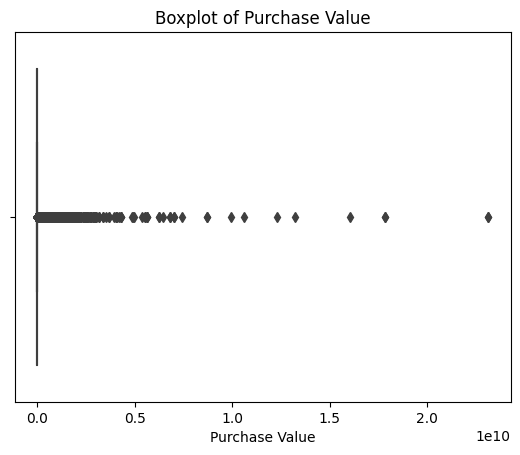

In [62]:
sns.boxplot(data=train_df, x='purchaseValue')
plt.title('Boxplot of Purchase Value')
plt.xlabel('Purchase Value')
plt.show()


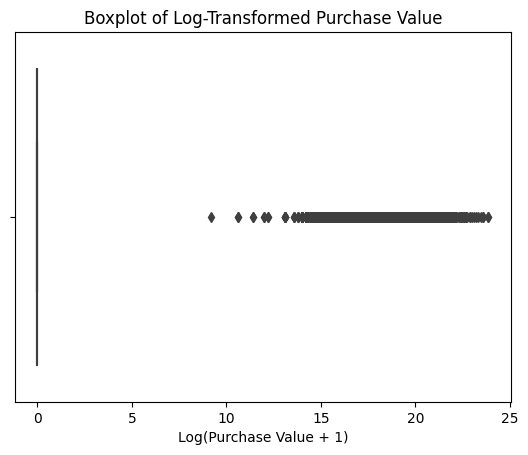

In [63]:
sns.boxplot(data=train_df, x=np.log1p(train_df['purchaseValue']))
plt.title("Boxplot of Log-Transformed Purchase Value")
plt.xlabel("Log(Purchase Value + 1)")
plt.show()

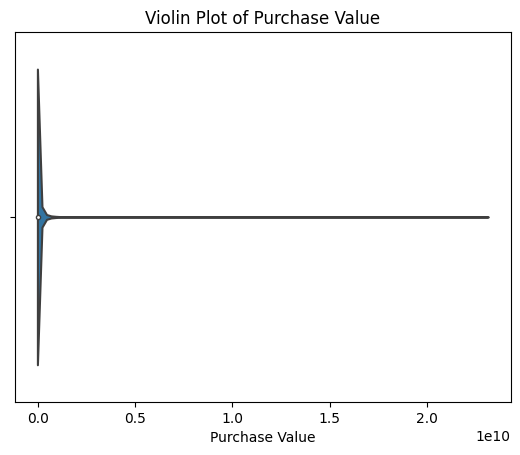

In [64]:
sns.violinplot(data=train_df, x='purchaseValue')
plt.title('Violin Plot of Purchase Value')
plt.xlabel('Purchase Value')
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


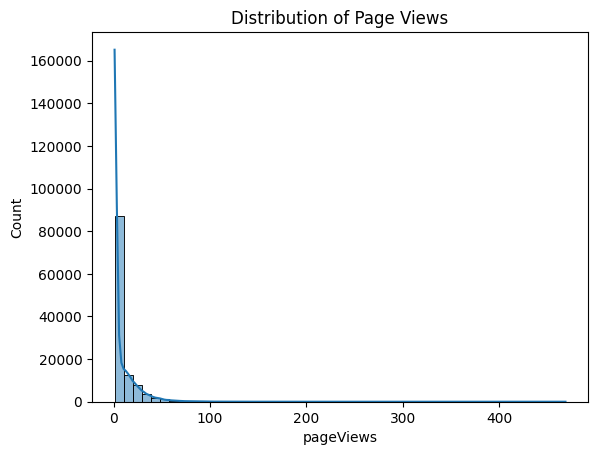

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


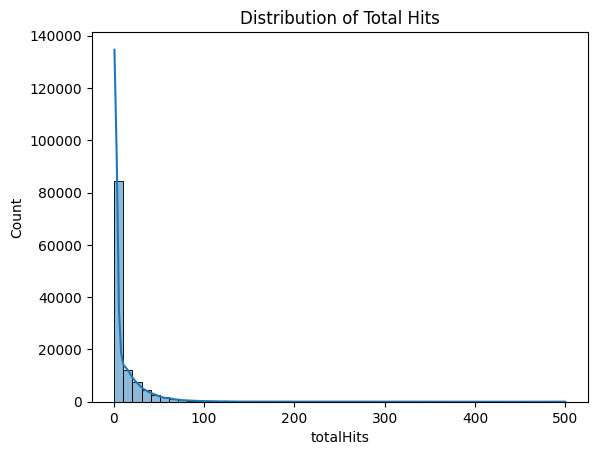

In [65]:
# Histogram for pageViews
sns.histplot(data=train_df, x='pageViews', bins=50, kde=True)
plt.title('Distribution of Page Views')
plt.show()

# Histogram for totalHits
sns.histplot(data=train_df, x='totalHits', bins=50, kde=True)
plt.title('Distribution of Total Hits')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


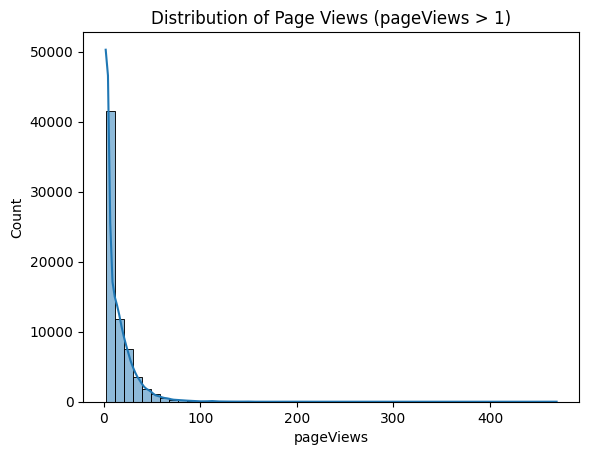

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


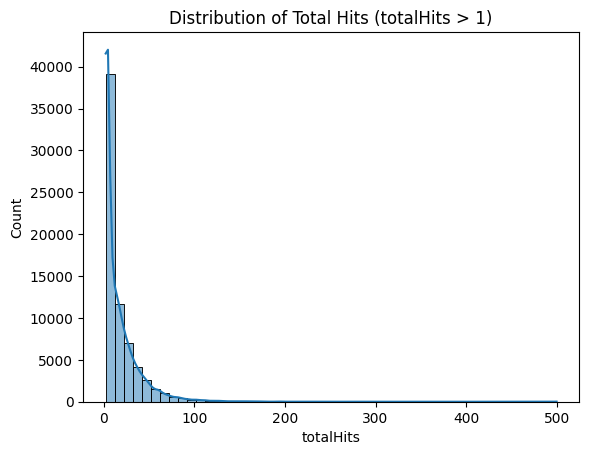

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram for pageViews > 0
sns.histplot(data=train_df[train_df['pageViews'] > 1], x='pageViews', bins=50, kde=True)
plt.title('Distribution of Page Views (pageViews > 1)')
plt.show()

# Histogram for totalHits > 0
sns.histplot(data=train_df[train_df['totalHits'] > 1], x='totalHits', bins=50, kde=True)
plt.title('Distribution of Total Hits (totalHits > 1)')
plt.show()


In [67]:
train_df['pageViews'].value_counts()

pageViews
1.0      47372
2.0      14163
3.0       7627
4.0       4773
5.0       3509
         ...  
153.0        1
466.0        1
176.0        1
124.0        1
171.0        1
Name: count, Length: 175, dtype: int64

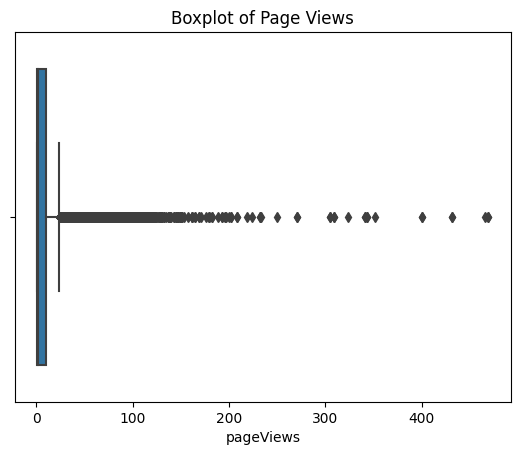

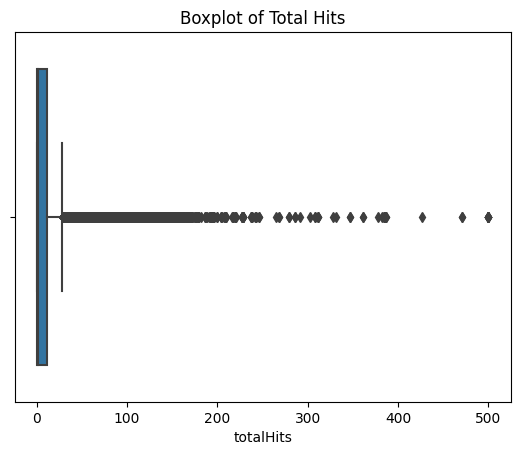

In [68]:
# Boxplot for pageViews
sns.boxplot(data=train_df, x='pageViews')
plt.title('Boxplot of Page Views')
plt.show()

# Boxplot for totalHits
sns.boxplot(data=train_df, x='totalHits')
plt.title('Boxplot of Total Hits')
plt.show()


In [69]:
#train_df['totalHits'].value_counts()

In [70]:
#train_df['totalHits'].value_counts()[train_df['totalHits'].value_counts() > 100]

In [71]:
# vc = train_df['totalHits'].value_counts()
# vc[(vc >= 1) & (vc <= 20)]

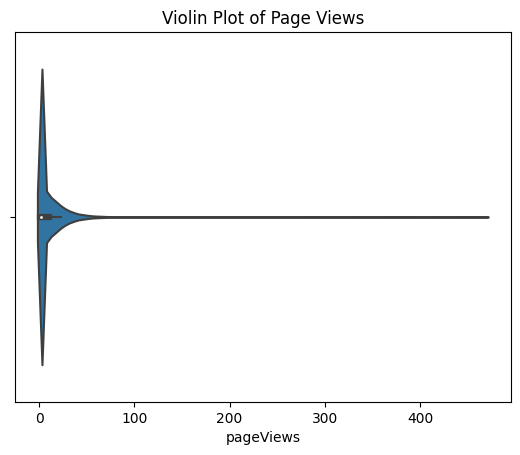

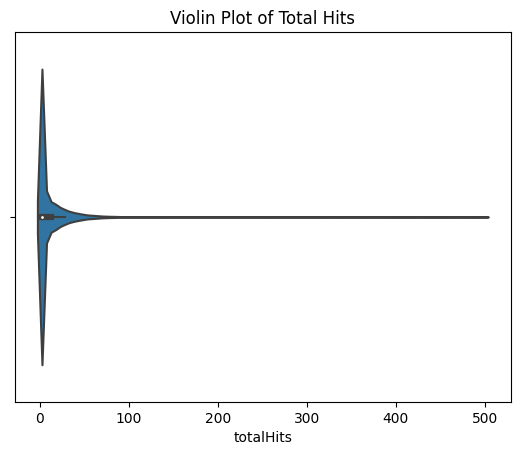

In [72]:
# Violin plot for pageViews
sns.violinplot(data=train_df, x='pageViews')
plt.title('Violin Plot of Page Views')
plt.show()

# Violin plot for totalHits
sns.violinplot(data=train_df, x='totalHits')
plt.title('Violin Plot of Total Hits')
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


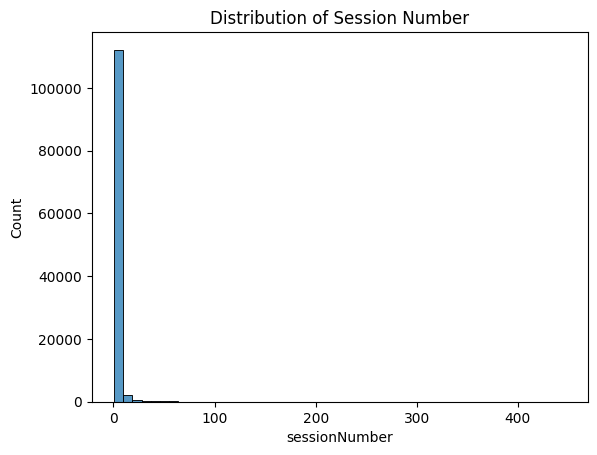

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


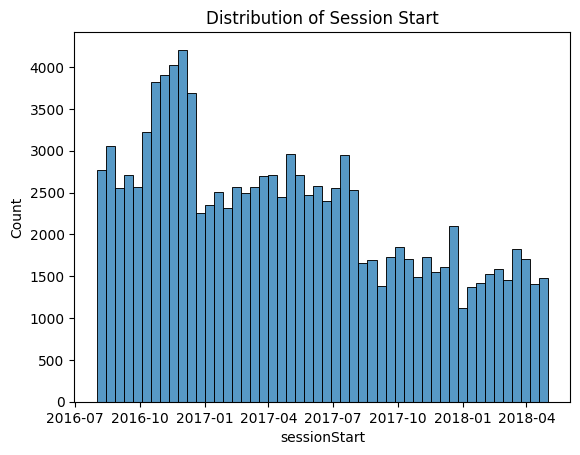

In [73]:
# Histogram for sessionNumber
sns.histplot(data=train_df, x='sessionNumber', bins=50)
plt.title('Distribution of Session Number')
plt.show()

train_df['sessionStart'] = pd.to_datetime(train_df['sessionStart'], unit='s')

# # Histogram for date
# sns.histplot(data=train_df, x='sessionStart', bins=50)
# plt.title('Distribution of Dates')
# plt.show()

# Histogram for sessionStart (convert if needed)
sns.histplot(data=train_df, x='sessionStart', bins=50)
plt.title('Distribution of Session Start')
plt.show()

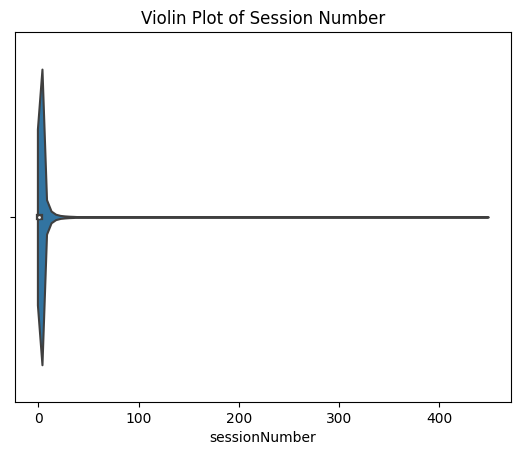

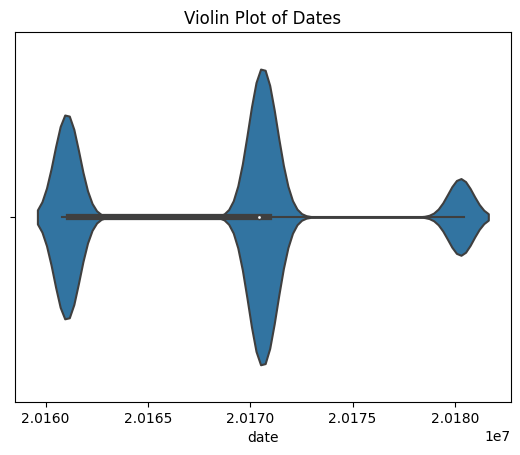

In [74]:
# Violin plot for sessionNumber
sns.violinplot(data=train_df, x='sessionNumber')
plt.title('Violin Plot of Session Number')
plt.show()


# Violin plot for date
sns.violinplot(data=train_df, x='date')
plt.title('Violin Plot of Dates')
plt.show()


In [75]:
# # Browser
# sns.countplot(data=train_df, x='browser', order=train_df['browser'].value_counts().index[:10])
# plt.title('Top 10 Browsers')
# plt.xticks(rotation=45)
# plt.show()

# # OS
# sns.countplot(data=train_df, x='os', order=train_df['os'].value_counts().index[:10])
# plt.title('Top 10 Operating Systems')
# plt.xticks(rotation=45)
# plt.show()

# # Device Type
# sns.countplot(data=train_df, x='deviceType', order=train_df['deviceType'].value_counts().index)
# plt.title('Device Type Distribution')
# plt.xticks(rotation=45)
# plt.show()

# # Language
# sns.countplot(data=train_df, x='device.language', order=train_df['device.language'].value_counts().index[:10])
# plt.title('Top 10 Device Languages')
# plt.xticks(rotation=45)
# plt.show()

In [76]:
#train_df['browser'].value_counts()

In [77]:
def clean_and_group_categories(df, column, top_n, missing_values=None, replacement='Other'):
    """
    Cleans a categorical column by:
    - Replacing placeholder values
    - Handling NaNs
    - Keeping only top N frequent categories
    - Replacing all others with a replacement value

    Args:
        df (pd.DataFrame): The DataFrame.
        column (str): Column to clean.
        top_n (int): Number of top categories to keep.
        missing_values (list or None): List of placeholder values to replace.
        replacement (str): Value to replace rare or missing entries.

    Returns:
        pd.DataFrame: Updated DataFrame.
    """
    if missing_values:
        df[column] = df[column].replace(missing_values, replacement)
    df[column] = df[column].fillna(replacement)

    top_categories = df[column].value_counts().nlargest(top_n).index
    df[column] = df[column].apply(lambda x: x if x in top_categories else replacement)
    return df


In [78]:
columns_to_clean = [
    # Format: (column_name, top_n, missing_values, replacement)
    ('browser', 15, ['(not set)', 'not available in demo dataset'], 'Other'),
    ('os', 6, ['(not set)', 'not available in demo dataset'], 'Other'),
    ('locationCountry', 10, ['(not set)', 'not available in demo dataset'], 'Unknown'),
    ('geoNetwork.city', 10, ['(not set)', 'not available in demo dataset'], 'Unknown'),
    ('geoNetwork.continent', 10, ['(not set)', 'not available in demo dataset'], 'Unknown'),
    ('geoNetwork.region', 10, ['(not set)', 'not available in demo dataset'], 'Unknown'),
    ('trafficSource.campaign', 10, None, 'Unknown'),
    ('trafficSource.referralPath', 15, ['(not provided)'], 'Others'),
    ('trafficSource.keyword', 20, ['(not provided)'], 'Others')  # approximation of top categories
]

for col, top_n, missing_vals, replacement in columns_to_clean:
    train_df = clean_and_group_categories(train_df, col, top_n, missing_vals, replacement)
    test_df = clean_and_group_categories(test_df, col, top_n, missing_vals, replacement)


In [79]:
#train_df.info()

In [80]:
# train_df['browser'] = train_df['browser'].replace(
#     ['not available in demo dataset', '(not set)'],
#     'Other'
# )
# # Step 1: Get top 5 most frequent browsers
# top_browsers = train_df['browser'].value_counts().nlargest(15).index

# # Step 2: Replace less frequent browsers with 'Other' in the same column
# train_df['browser'] = train_df['browser'].apply(
#     lambda x: x if x in top_browsers else 'Other'
# )


In [81]:
# test_df['browser'] = test_df['browser'].replace(
#     ['not available in demo dataset', '(not set)'],
#     'Other'
# )
# # Step 1: Get top 5 most frequent browsers
# #top_browsers = test_df['browser'].value_counts().nlargest(15).index

# # Step 2: Replace less frequent browsers with 'Other' in the same column
# test_df['browser'] = test_df['browser'].apply(
#     lambda x: x if x in top_browsers else 'Other'
# )

In [82]:
#train_df['browser'].value_counts()

In [83]:
#train_df['os'].value_counts()

In [84]:
# train_df['os'] = train_df['os'].replace(
#     ['not available in demo dataset', '(not set)'],
#     'Other'
# )
# # Step 1: Get top 5 most frequent browsers
# top_os = train_df['os'].value_counts().nlargest(6).index

# # Step 2: Replace less frequent browsers with 'Other' in the same column
# train_df['os'] = train_df['os'].apply(
#     lambda x: x if x in top_os else 'Other'
# )


In [85]:
#train_df['os'].value_counts()

In [86]:
# test_df['os'] = test_df['os'].replace(
#     ['not available in demo dataset', '(not set)'],
#     'Other'
# )
# # Step 1: Get top 5 most frequent browsers
# #top_os = train_df['os'].value_counts().nlargest(6).index

# # Step 2: Replace less frequent browsers with 'Other' in the same column
# test_df['os'] = test_df['os'].apply(
#     lambda x: x if x in top_os else 'Other'
# )


In [87]:
#train_df['deviceType'].value_counts()

In [88]:
#train_df['device.language'].value_counts()

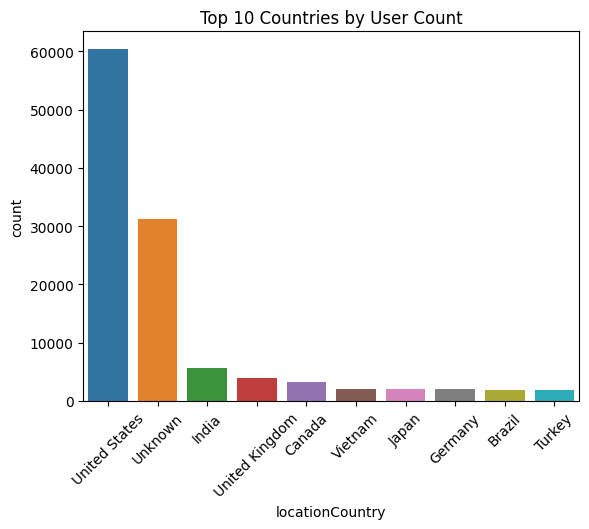

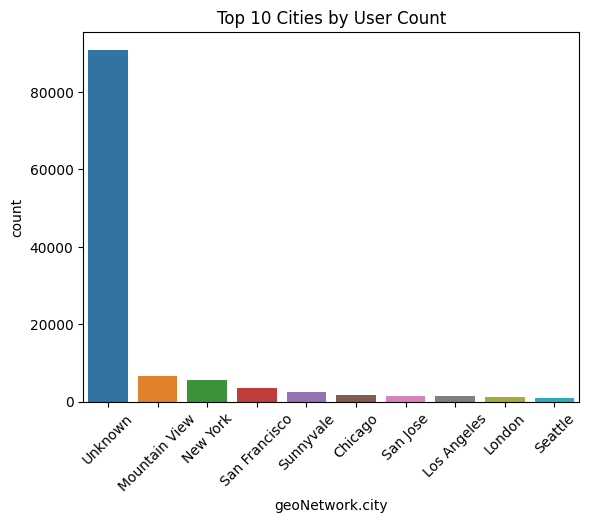

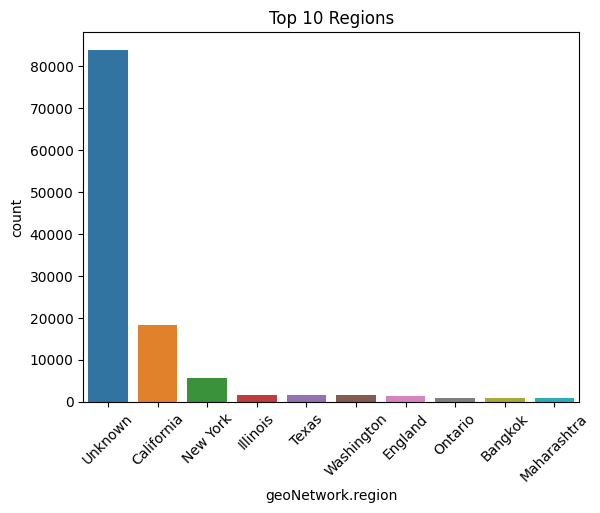

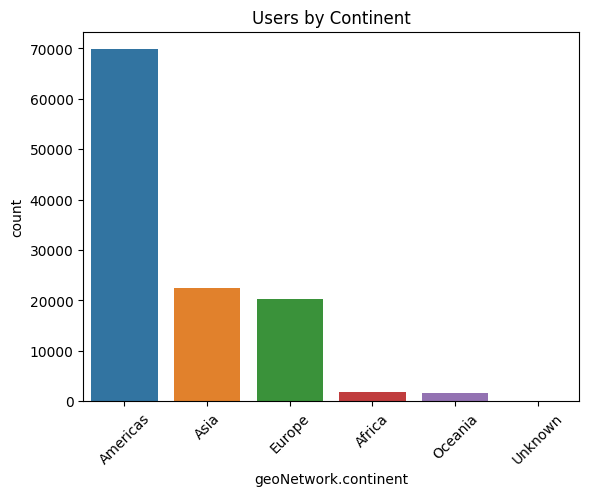

In [89]:
sns.countplot(data=train_df, x='locationCountry', order=train_df['locationCountry'].value_counts().index[:10])
plt.title('Top 10 Countries by User Count')
plt.xticks(rotation=45)
plt.show()

# City
sns.countplot(data=train_df, x='geoNetwork.city', order=train_df['geoNetwork.city'].value_counts().index[:10])
plt.title('Top 10 Cities by User Count')
plt.xticks(rotation=45)
plt.show()

# Region
sns.countplot(data=train_df, x='geoNetwork.region', order=train_df['geoNetwork.region'].value_counts().index[:10])
plt.title('Top 10 Regions')
plt.xticks(rotation=45)
plt.show()

# Continent
sns.countplot(data=train_df, x='geoNetwork.continent', order=train_df['geoNetwork.continent'].value_counts().index)
plt.title('Users by Continent')
plt.xticks(rotation=45)
plt.show()

In [90]:
train_df['locationCountry'].value_counts()

locationCountry
United States     60369
Unknown           31206
India              5596
United Kingdom     3902
Canada             3226
Vietnam            2119
Japan              2031
Germany            2025
Brazil             1983
Turkey             1821
Thailand           1745
Name: count, dtype: int64

In [91]:
# train_df['locationCountry'] = train_df['locationCountry'].replace(
#     ['not available in demo dataset', '(not set)'],
#     'Unknown'
# )
# # Step 1: Get the top 10 countries
# top_countries = train_df['locationCountry'].value_counts().nlargest(10).index

# # Step 2: Replace all others with 'Other'
# train_df['locationCountry'] = train_df['locationCountry'].apply(
#     lambda x: x if x in top_countries else 'Unknown'
# )


In [92]:
#train_df['locationCountry'].value_counts()

In [93]:
# test_df['locationCountry'] = test_df['locationCountry'].replace(
#     ['not available in demo dataset', '(not set)'],
#     'Unknown'
# )
# # Step 1: Get the top 10 countries
# #top_countries = train_df['locationCountry'].value_counts().nlargest(10).index

# # Step 2: Replace all others with 'Other'
# test_df['locationCountry'] = test_df['locationCountry'].apply(
#     lambda x: x if x in top_countries else 'Unknown'
# )

In [94]:
#test_df['locationCountry'].value_counts()

In [95]:
# train_df['geoNetwork.city'] = train_df['geoNetwork.city'].replace(
#     ['not available in demo dataset', '(not set)'],
#     'Unknown'
# )

# # Step 1: Get the top 10 countries
# top_geoNetwork_city = train_df['geoNetwork.city'].value_counts().nlargest(10).index

# # Step 2: Replace all others with 'Other'
# train_df['geoNetwork.city'] = train_df['geoNetwork.city'].apply(
#     lambda x: x if x in top_geoNetwork_city else 'Unknown'
# )


In [96]:
# test_df['geoNetwork.city'] = test_df['geoNetwork.city'].replace(
#     ['not available in demo dataset', '(not set)'],
#     'Unknown'
# )

# # Step 1: Get the top 10 countries
# #top_geoNetwork_city = train_df['geoNetwork.city'].value_counts().nlargest(10).index

# # Step 2: Replace all others with 'Other'
# test_df['geoNetwork.city'] = test_df['geoNetwork.city'].apply(
#     lambda x: x if x in top_geoNetwork_city else 'Unknown'
# )


In [97]:
# train_df['geoNetwork.continent'] = train_df['geoNetwork.continent'].replace(
#     ['not available in demo dataset', '(not set)'],
#     'Unknown'
# )

# # Step 1: Get the top 10 countries
# top_geoNetwork_continent = train_df['geoNetwork.continent'].value_counts().nlargest(10).index

# # Step 2: Replace all others with 'Other'
# train_df['geoNetwork.continent'] = train_df['geoNetwork.continent'].apply(
#     lambda x: x if x in top_geoNetwork_continent else 'Unknown'
# )

In [98]:
# test_df['geoNetwork.continent'] = test_df['geoNetwork.continent'].replace(
#     ['not available in demo dataset', '(not set)'],
#     'Unknown'
# )

# # Step 1: Get the top 10 countries
# #top_geoNetwork_continent = train_df['geoNetwork.continent'].value_counts().nlargest(10).index

# # Step 2: Replace all others with 'Other'
# test_df['geoNetwork.continent'] = test_df['geoNetwork.continent'].apply(
#     lambda x: x if x in top_geoNetwork_continent else 'Unknown'
# )

In [99]:
#train_df['geoNetwork.continent'].value_counts()

In [100]:
#train_df['locationCountry'].value_counts()

In [101]:
#train_df['geoNetwork.city'].value_counts()

In [102]:
#train_df['geoNetwork.city'].value_counts()

In [103]:
#test_df['geoNetwork.city'].value_counts()

In [104]:
#train_df['geoNetwork.region'].value_counts()

In [105]:
# train_df['geoNetwork.region'] = train_df['geoNetwork.region'].replace(
#     ['not available in demo dataset', '(not set)'],
#     'Unknown'
# )

# # Step 1: Get the top 10 countries
# top_geoNetwork_continent = train_df['geoNetwork.region'].value_counts().nlargest(10).index

# # Step 2: Replace all others with 'Other'
# train_df['geoNetwork.region'] = train_df['geoNetwork.region'].apply(
#     lambda x: x if x in top_geoNetwork_continent else 'Unknown'
# )

In [106]:
#train_df['geoNetwork.region'].value_counts()

In [107]:
# test_df['geoNetwork.region'] = test_df['geoNetwork.region'].replace(
#     ['not available in demo dataset', '(not set)'],
#     'Unknown'
# )

# Step 2: Replace all others with 'Other'
# test_df['geoNetwork.region'] = test_df['geoNetwork.region'].apply(
#     lambda x: x if x in top_geoNetwork_continent else 'Unknown'
# )

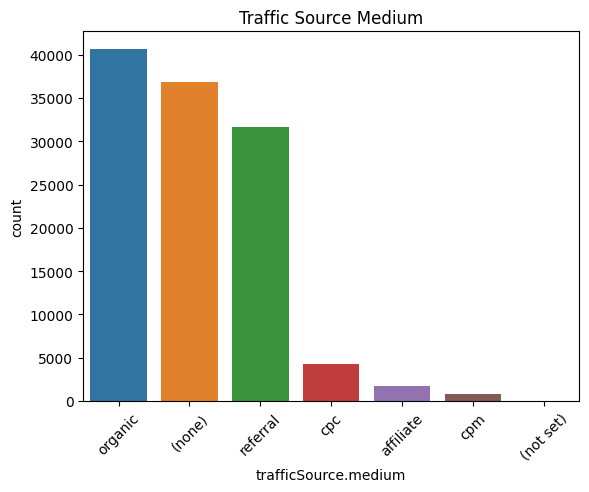

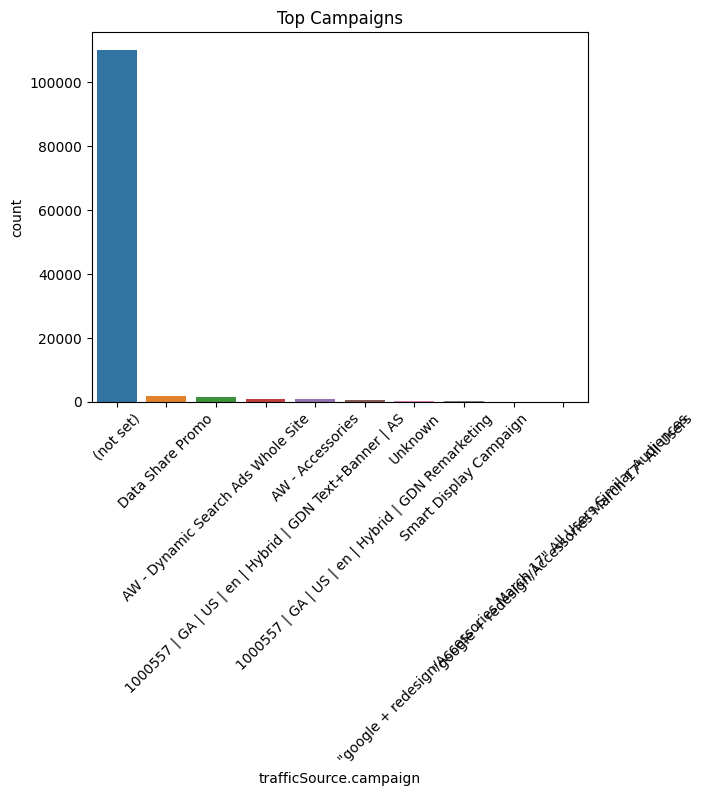

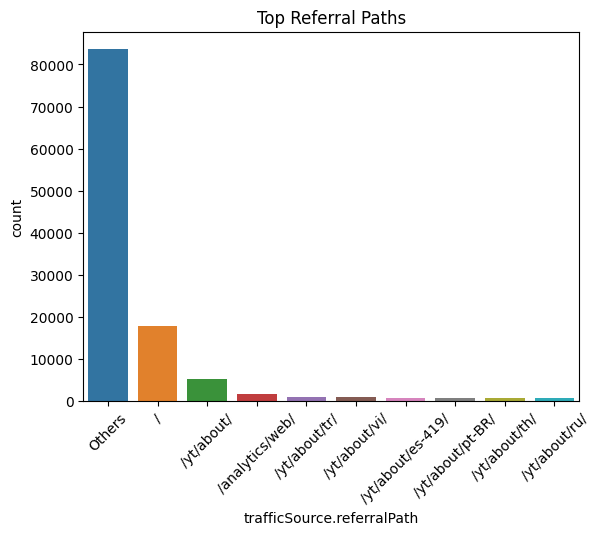

In [108]:
# Medium
sns.countplot(data=train_df, x='trafficSource.medium', order=train_df['trafficSource.medium'].value_counts().index[:10])
plt.title('Traffic Source Medium')
plt.xticks(rotation=45)
plt.show()

# Campaign
sns.countplot(data=train_df, x='trafficSource.campaign', order=train_df['trafficSource.campaign'].value_counts().index[:10])
plt.title('Top Campaigns')
plt.xticks(rotation=45)
plt.show()

# Referral Path
sns.countplot(data=train_df, x='trafficSource.referralPath', order=train_df['trafficSource.referralPath'].value_counts().index[:10])
plt.title('Top Referral Paths')
plt.xticks(rotation=45)
plt.show()


In [109]:
#train_df['trafficSource.medium'].value_counts()

In [110]:
# train_df['trafficSource.medium'] = train_df['trafficSource.medium'].replace(
#     ['(none)', '(not set)'],
#     'Unknown'
# )
# test_df['trafficSource.medium'] = test_df['trafficSource.medium'].replace(
#     ['(none)', '(not set)'],
#     'Unknown'
# )

In [111]:
#train_df['trafficSource.medium'].value_counts()

In [112]:
#train_df['trafficSource.campaign'].value_counts()

In [113]:
# # Step 1: Get the top 10 countries
# top_trafficSource_campaign = train_df['trafficSource.campaign'].value_counts().nlargest(10).index

# # Step 2: Replace all others with 'Other'
# train_df['trafficSource.campaign'] = train_df['trafficSource.campaign'].apply(
#     lambda x: x if x in top_trafficSource_campaign else 'Unknown'
# )

In [114]:

# # Step 2: Replace all others with 'Other'
# test_df['trafficSource.campaign'] = test_df['trafficSource.campaign'].apply(
#     lambda x: x if x in top_trafficSource_campaign else 'Unknown'
# )

In [115]:
#train_df['trafficSource.campaign'].value_counts()

In [116]:
#train_df['trafficSource.referralPath'].value_counts()

In [117]:
# # User Channel
# sns.countplot(data=train_df, x='userChannel', order=train_df['userChannel'].value_counts().index[:10])
# plt.title('User Channels')
# plt.xticks(rotation=45)
# plt.show()

# # Social Engagement Type
# sns.countplot(data=train_df, x='socialEngagementType', order=train_df['socialEngagementType'].value_counts().index)
# plt.title('Social Engagement Types')
# plt.xticks(rotation=45)
# plt.show()


In [118]:
#train_df['socialEngagementType'].value_counts()

In [119]:
#test_df['socialEngagementType'].value_counts()

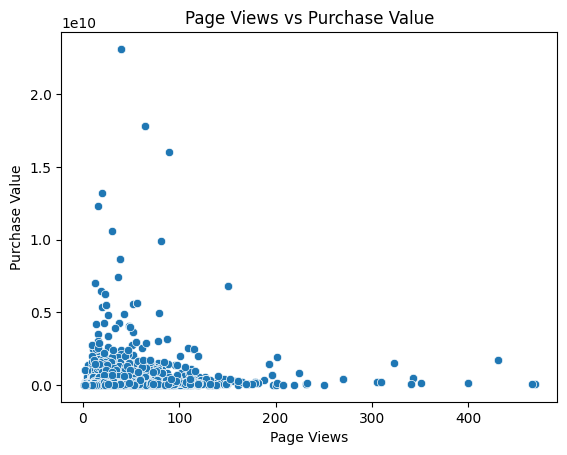

In [120]:
sns.scatterplot(data=train_df, x='pageViews', y='purchaseValue')
plt.title('Page Views vs Purchase Value')
plt.xlabel('Page Views')
plt.ylabel('Purchase Value')
plt.show()

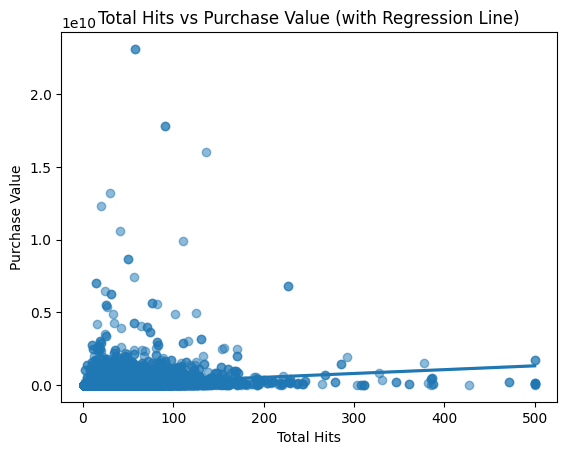

In [121]:
sns.regplot(data=train_df, x='totalHits', y='purchaseValue', scatter_kws={'alpha':0.5})
plt.title('Total Hits vs Purchase Value (with Regression Line)')
plt.xlabel('Total Hits')
plt.ylabel('Purchase Value')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


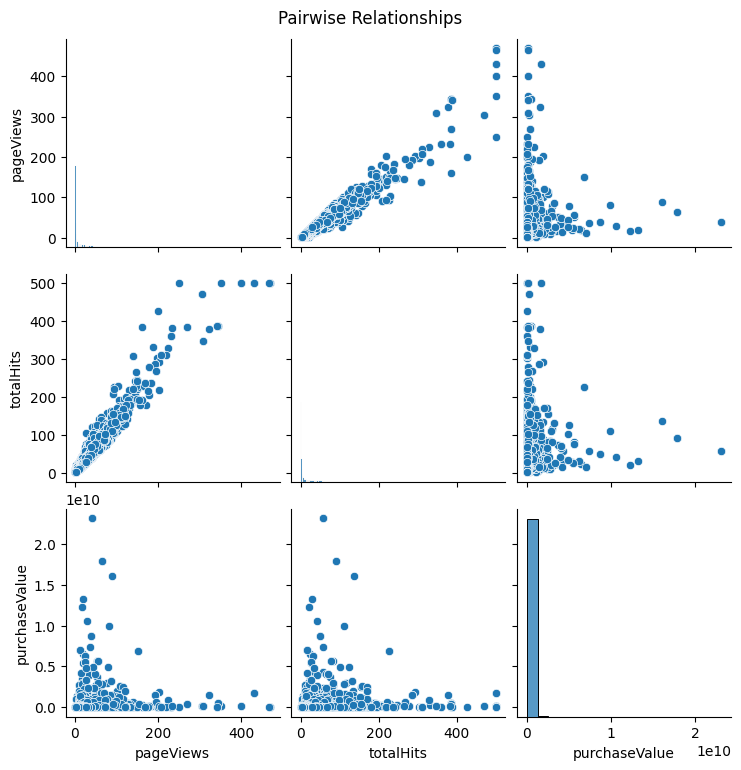

In [122]:
selected_cols = ['pageViews', 'totalHits', 'purchaseValue']
sns.pairplot(train_df[selected_cols])
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


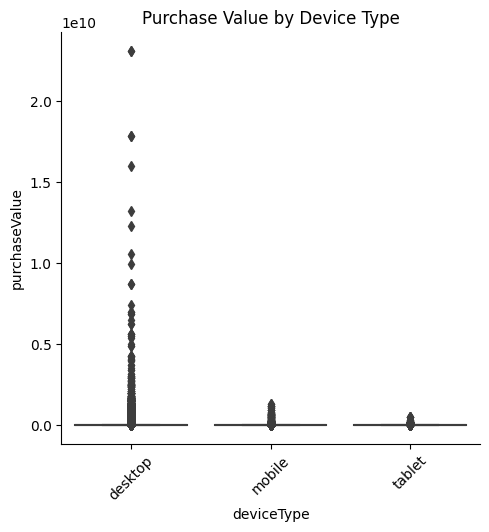

In [123]:
sns.catplot(data=train_df, x='deviceType', y='purchaseValue', kind='box')
plt.title('Purchase Value by Device Type')
plt.xticks(rotation=45)
plt.show()

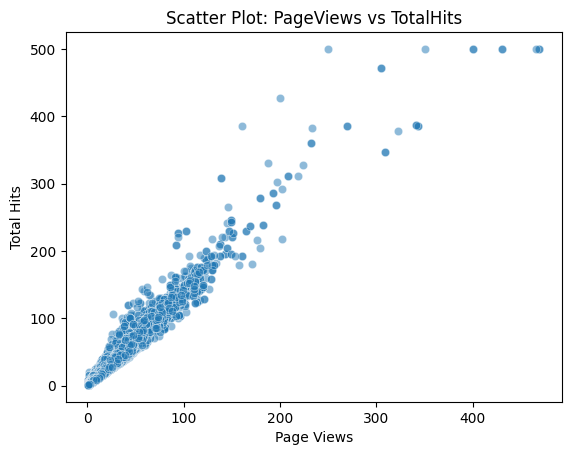

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=train_df, x='pageViews', y='totalHits', alpha=0.5)
plt.title('Scatter Plot: PageViews vs TotalHits')
plt.xlabel('Page Views')
plt.ylabel('Total Hits')
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


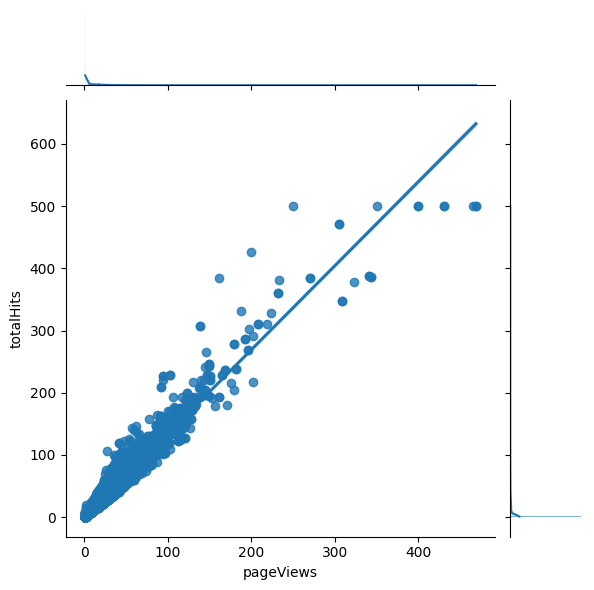

In [125]:
sns.jointplot(data=train_df, x='pageViews', y='totalHits', kind='reg', height=6)


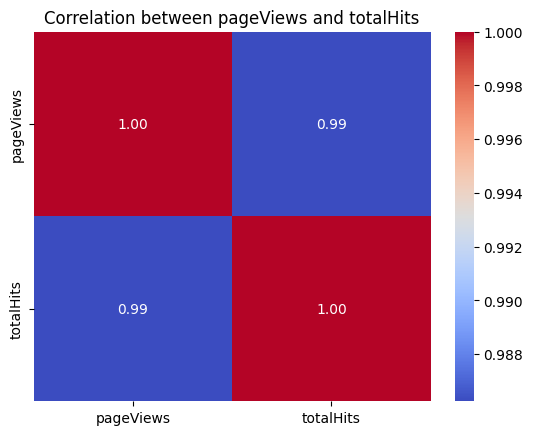

In [126]:
corr = train_df[['pageViews', 'totalHits']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between pageViews and totalHits')
plt.show()


Text(0.5, 1.0, 'Log-Scale Scatter Plot')

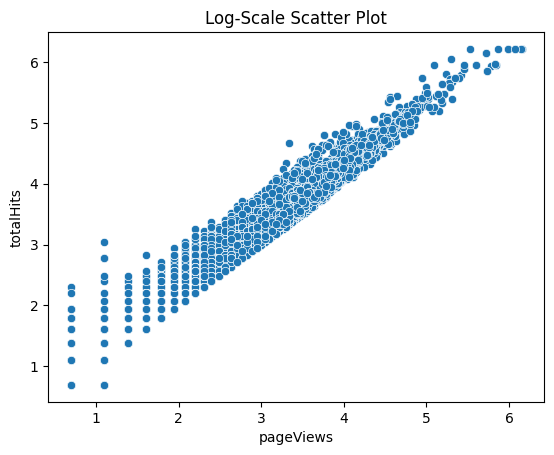

In [127]:
sns.scatterplot(x=np.log1p(train_df['pageViews']), y=np.log1p(train_df['totalHits']))
plt.title('Log-Scale Scatter Plot')


In [128]:
#train_df[['pageViews','totalHits']]

In [129]:
#test_df[['pageViews','totalHits']]

In [130]:
train_df['avg_interaction'] = (train_df['pageViews'] + train_df['totalHits']) / 2


In [131]:
test_df['avg_interaction'] = (train_df['pageViews'] + train_df['totalHits']) / 2

In [132]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116023 entries, 0 to 116022
Data columns (total 31 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   trafficSource.isTrueDirect  116023 non-null  int64         
 1   purchaseValue               116023 non-null  float64       
 2   browser                     116023 non-null  object        
 3   trafficSource.keyword       116023 non-null  object        
 4   geoCluster                  116023 non-null  object        
 5   userId                      116023 non-null  int64         
 6   trafficSource.campaign      116023 non-null  object        
 7   geoNetwork.networkDomain    116023 non-null  object        
 8   gclIdPresent                116023 non-null  int64         
 9   sessionNumber               116023 non-null  int64         
 10  geoNetwork.region           116023 non-null  object        
 11  trafficSource               116023 non-

In [133]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29006 entries, 0 to 29005
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   userChannel                 29006 non-null  object 
 1   date                        29006 non-null  int64  
 2   browser                     29006 non-null  object 
 3   deviceType                  29006 non-null  object 
 4   device.isMobile             29006 non-null  bool   
 5   os                          29006 non-null  object 
 6   geoNetwork.city             29006 non-null  object 
 7   geoNetwork.continent        29006 non-null  object 
 8   locationCountry             29006 non-null  object 
 9   geoNetwork.metro            29006 non-null  object 
 10  geoNetwork.networkDomain    29006 non-null  object 
 11  geoNetwork.region           29006 non-null  object 
 12  geoNetwork.subContinent     29006 non-null  object 
 13  totals.bounces              290

In [134]:
#train_df[['date', 'sessionStart', 'sessionId']].dtypes


In [135]:
# # Convert int to datetime
# train_df['date'] = pd.to_datetime(train_df['date'], format='%Y%m%d')

# # Convert both date and sessionStart to numeric for correlation
# train_df['date_ordinal'] = train_df['date'].map(lambda x: x.toordinal())
# train_df['sessionStart_numeric'] = train_df['sessionStart'].astype('int64') // 1e9  # seconds


In [136]:
#train_df[['date_ordinal', 'sessionStart_numeric']].corr()


In [137]:
#train_df[['date', 'sessionStart']]

In [138]:
#train_df['session_delay_seconds'] = (train_df['sessionStart'] - train_df['date']).dt.total_seconds()


In [139]:
#train_df['session_delay_days'] = train_df['session_delay_seconds'] / 86400

In [140]:
#train_df['session_delay_days']

In [141]:
#


In [142]:
#print(train_df['session_delay_days'].describe())


In [143]:
# Convert to datetime if not already
train_df['sessionStart'] = pd.to_datetime(train_df['sessionStart'])

# Extract useful features
train_df['session_day_of_week'] = train_df['sessionStart'].dt.dayofweek  # Monday=0, Sunday=6
train_df['session_hour'] = train_df['sessionStart'].dt.hour            # Hour of the day 0-23
train_df['session_day'] = train_df['sessionStart'].dt.day              # Day of the month
train_df['session_month'] = train_df['sessionStart'].dt.month          # Month 1-12
train_df['session_weekofyear'] = train_df['sessionStart'].dt.isocalendar().week  # Week number
train_df['session_is_weekend'] = (train_df['session_day_of_week'] >= 5).astype(int)  # 1 if Sat/Sun else 0


In [144]:
# Convert to datetime if not already
test_df['sessionStart'] = pd.to_datetime(test_df['sessionStart'])

# Extract time features
test_df['session_day_of_week'] = test_df['sessionStart'].dt.dayofweek  # Monday=0, Sunday=6
test_df['session_hour'] = test_df['sessionStart'].dt.hour              # Hour of the day 0-23
test_df['session_day'] = test_df['sessionStart'].dt.day                # Day of the month
test_df['session_month'] = test_df['sessionStart'].dt.month            # Month 1-12
test_df['session_weekofyear'] = test_df['sessionStart'].dt.isocalendar().week  # Week number
test_df['session_is_weekend'] = (test_df['session_day_of_week'] >= 5).astype(int)  # 1 if Sat/Sun else 0


In [145]:
#train_df[['sessionStart','session_day_of_week','session_hour','session_day','session_month','session_weekofyear','session_is_weekend']]

In [146]:
# Drop columns from train and test DataFrames
train_df = train_df.drop(columns=['sessionStart', 'date'], errors='ignore')
test_df = test_df.drop(columns=['sessionStart', 'date'], errors='ignore')


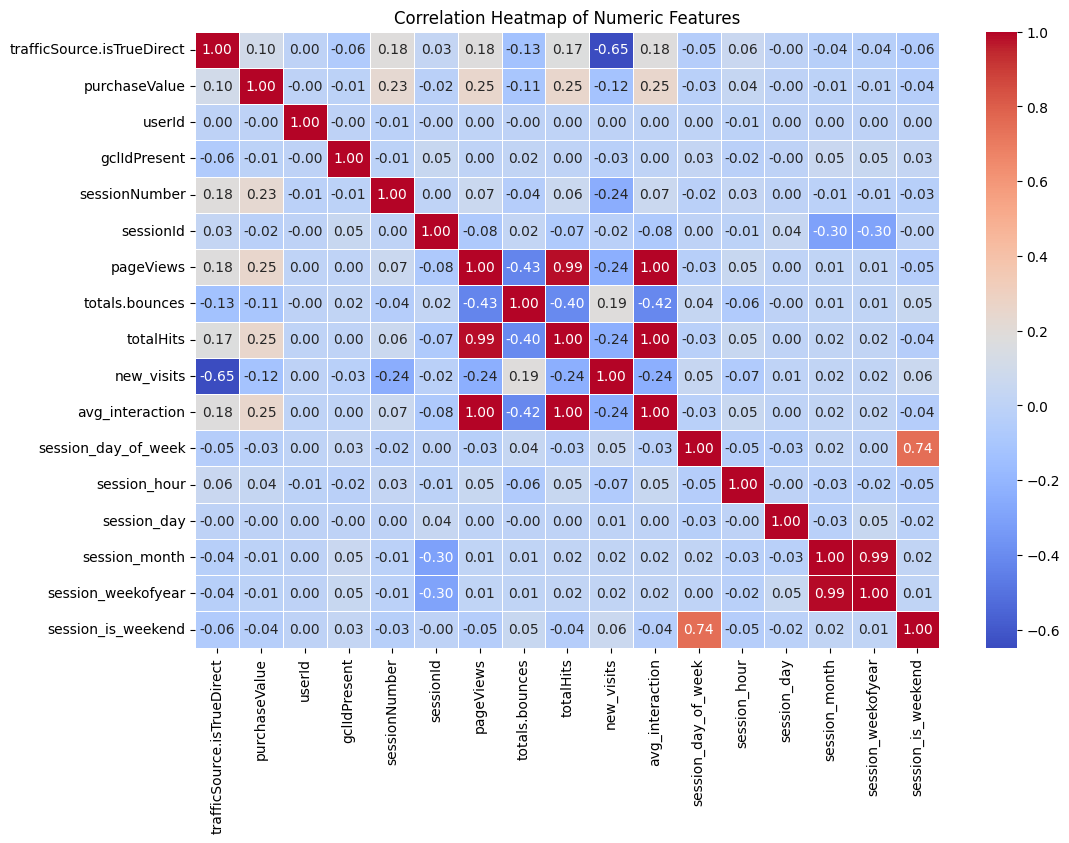

In [147]:
# Select numeric features
numeric_cols = train_df.select_dtypes(include=['number'])

# Compute correlation matrix
corr = numeric_cols.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

In [148]:
from sklearn.ensemble import RandomForestRegressor

# Prepare data
X = train_df[numeric_cols.drop('purchaseValue', axis=1).columns]
y = train_df['purchaseValue']

# Fit model
model = RandomForestRegressor(random_state=42)
model.fit(X, y)

# Get feature importances
importances = pd.Series(model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

# Show top 10
print("Top 10 important numeric features:")
print(importances.head(10))


Top 10 important numeric features:
sessionNumber          0.261625
pageViews              0.117784
avg_interaction        0.114854
totalHits              0.098032
sessionId              0.094661
userId                 0.081660
session_hour           0.075387
session_day            0.054602
session_weekofyear     0.039497
session_day_of_week    0.030902
dtype: float64


In [149]:
# Correlation with target
target_corr = corr['purchaseValue'].drop('purchaseValue')  # remove self-correlation

# Sort by absolute correlation value (strongest relationships)
top_features = target_corr.abs().sort_values(ascending=False)

# Print top N features
print("Top correlated numeric features with 'purchaseValue':")
print(top_features.head(10))

Top correlated numeric features with 'purchaseValue':
totalHits                     0.251651
avg_interaction               0.251146
pageViews                     0.248456
sessionNumber                 0.230585
new_visits                    0.123070
totals.bounces                0.107116
trafficSource.isTrueDirect    0.099879
session_hour                  0.038017
session_is_weekend            0.036545
session_day_of_week           0.027644
Name: purchaseValue, dtype: float64


In [150]:
cat_cols = train_df.select_dtypes(include='object').columns

In [151]:
encoded_df = train_df.copy()

for col in cat_cols:
    target_mean = encoded_df.groupby(col)['purchaseValue'].mean()
    encoded_df[col + '_encoded'] = encoded_df[col].map(target_mean)


In [152]:
encoded_cols = [col for col in encoded_df.columns if col.endswith('_encoded')]
correlations = encoded_df[encoded_cols + ['purchaseValue']].corr()['purchaseValue'].drop('purchaseValue')


In [153]:
correlations.sort_values(ascending=False)

trafficSource_encoded                 0.138257
locationCountry_encoded               0.111033
geoNetwork.subContinent_encoded       0.109037
userChannel_encoded                   0.107092
trafficSource.medium_encoded          0.103303
geoNetwork.continent_encoded          0.098911
geoNetwork.metro_encoded              0.097430
trafficSource.referralPath_encoded    0.093982
os_encoded                            0.091945
geoNetwork.region_encoded             0.080864
geoNetwork.city_encoded               0.080108
deviceType_encoded                    0.064075
browser_encoded                       0.063035
trafficSource.campaign_encoded        0.022911
trafficSource.keyword_encoded         0.020628
geoCluster_encoded                    0.011048
geoNetwork.networkDomain_encoded      0.001241
Name: purchaseValue, dtype: float64

In [154]:
train_df['purchaseValue_imputed'] = train_df['purchaseValue'].fillna(0)


### Linear Regression

In [155]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder, StandardScaler
# from sklearn.pipeline import Pipeline
# from sklearn.impute import SimpleImputer
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import r2_score

# # Step 1: Feature selection
# cat_features = [
#     'trafficSource', 'locationCountry', 'geoNetwork.subContinent',
#     'userChannel', 'trafficSource.medium', 'trafficSource.referralPath',
#     'geoNetwork.continent', 'geoNetwork.metro', 'geoNetwork.region', 'os'
# ]

# num_features = ['avg_interaction', 'sessionNumber','new_visits','totals.bounces','trafficSource.isTrueDirect']
# selected_features = cat_features + num_features

# # Step 2: Remove top 1% outliers from target
# threshold = train_df['purchaseValue'].quantile(0.99)
# filtered_df = train_df[train_df['purchaseValue'] < threshold]

# # Step 3: Define features (X) and target (y)
# X = filtered_df[selected_features].copy()
# y = filtered_df['purchaseValue']

# # Step 4: Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# # Step 5: Preprocessing setup
# cat_cols = list(set(X_train.select_dtypes(include='object').columns) & set(cat_features))
# num_cols = list(set(X_train.select_dtypes(include='number').columns) & set(num_features))

# X_train[cat_cols] = X_train[cat_cols].astype(str)
# X_test[cat_cols] = X_test[cat_cols].astype(str)

# numeric_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='mean')),
#     ('scaler', StandardScaler())
# ])

# categorical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('onehot', OneHotEncoder(handle_unknown='ignore'))
# ])

# preprocessor = ColumnTransformer(transformers=[
#     ('num', numeric_transformer, num_cols),
#     ('cat', categorical_transformer, cat_cols)
# ])

# # Step 6: Build model pipeline
# pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('model', LinearRegression())
# ])

# # Step 7: Cross-validation
# scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')
# print(f"Cross-validation R² scores: {scores}")
# print(f"Average R²: {scores.mean():.4f}")

# # Step 8: Fit model and predict
# pipeline.fit(X_train, y_train)

# y_train_pred = pipeline.predict(X_train)
# y_test_pred = pipeline.predict(X_test)

# # Step 9: Evaluate model
# r2 = r2_score(y_test, y_test_pred)
# print(f"Test R²: {r2:.4f}")

# # Step 10: Residual plot
# residuals = y_train - y_train_pred
# plt.figure(figsize=(8, 5))
# sns.scatterplot(x=y_train_pred, y=residuals)
# plt.axhline(y=0, color='r', linestyle='--')
# plt.xlabel("Predicted purchaseValue (Train)")
# plt.ylabel("Residuals")
# plt.title("Residual Plot (Train Data)")
# plt.show()

# # Step 11: Predict on final test set (Kaggle/test_df)
# test_df[cat_cols] = test_df[cat_cols].astype(str)
# y_final_pred = pipeline.predict(test_df[selected_features])
# y_final_pred = np.maximum(0, y_final_pred)

# # Step 12: Create submission file
# submission = pd.DataFrame({
#     "id": np.arange(len(y_final_pred)),  # Replace with test_df["id"] if available
#     "purchaseValue": y_final_pred.round().astype(int)
# })

# submission.to_csv("submission.csv", index=False)
# print("Submission file created!")

# print(submission.head())
# print(submission.info())


In [156]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder, StandardScaler
# from sklearn.pipeline import Pipeline
# from sklearn.impute import SimpleImputer
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import r2_score

# # Step 1: Feature selection
# cat_features = [
#     'trafficSource', 'locationCountry', 'geoNetwork.subContinent',
#     'userChannel', 'trafficSource.medium', 'trafficSource.referralPath',
#     'geoNetwork.continent', 'geoNetwork.metro', 'geoNetwork.region', 'os'
# ]

# num_features = ['avg_interaction', 'sessionNumber','new_visits','totals.bounces','trafficSource.isTrueDirect']
# selected_features = cat_features + num_features

# # Step 2: Remove top 1% outliers from target
# threshold = train_df['purchaseValue'].quantile(0.99)
# filtered_df = train_df[train_df['purchaseValue'] < threshold]

# # Step 3: Define features (X) and log-transformed target (y)
# X = filtered_df[selected_features].copy()
# y = np.log1p(filtered_df['purchaseValue'])  # log1p ensures 0 is handled safely

# # Step 4: Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# # Step 5: Preprocessing setup
# cat_cols = list(set(X_train.select_dtypes(include='object').columns) & set(cat_features))
# num_cols = list(set(X_train.select_dtypes(include='number').columns) & set(num_features))

# X_train[cat_cols] = X_train[cat_cols].astype(str)
# X_test[cat_cols] = X_test[cat_cols].astype(str)

# numeric_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='mean')),
#     ('scaler', StandardScaler())
# ])

# categorical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('onehot', OneHotEncoder(handle_unknown='ignore'))
# ])

# preprocessor = ColumnTransformer(transformers=[
#     ('num', numeric_transformer, num_cols),
#     ('cat', categorical_transformer, cat_cols)
# ])

# # Step 6: Build model pipeline
# pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('model', LinearRegression())
# ])

# # Step 7: Cross-validation
# scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')
# print(f"Cross-validation R² scores: {scores}")
# print(f"Average R²: {scores.mean():.4f}")

# # Step 8: Fit model and predict
# pipeline.fit(X_train, y_train)

# y_train_pred_log = pipeline.predict(X_train)
# y_test_pred_log = pipeline.predict(X_test)

# # Step 9: Inverse log transformation to original scale
# CLIP_MIN, CLIP_MAX = 0, 20
# y_train_pred_log = np.clip(y_train_pred_log, CLIP_MIN, CLIP_MAX)
# y_test_pred_log = np.clip(y_test_pred_log, CLIP_MIN, CLIP_MAX)

# y_train_pred = np.expm1(y_train_pred_log)
# y_train_actual = np.expm1(y_train)

# y_test_pred = np.expm1(y_test_pred_log)
# y_test_actual = np.expm1(y_test)

# # Step 10: Evaluate model
# r2 = r2_score(y_test_actual, y_test_pred)
# print(f"Test R² (original scale): {r2:.4f}")

# # Step 11: Residual plot
# residuals = y_train_actual - y_train_pred
# plt.figure(figsize=(8, 5))
# sns.scatterplot(x=y_train_pred, y=residuals)
# plt.axhline(y=0, color='r', linestyle='--')
# plt.xlabel("Predicted purchaseValue (Train)")
# plt.ylabel("Residuals")
# plt.title("Residual Plot (Train Data, Log-Transformed)")
# plt.show()

# # Step 12: Predict on final test set (Kaggle/test_df)
# test_df[cat_cols] = test_df[cat_cols].astype(str)
# y_final_pred_log = pipeline.predict(test_df[selected_features])
# y_final_pred_log = np.clip(y_final_pred_log, CLIP_MIN, CLIP_MAX)
# y_final_pred = np.expm1(y_final_pred_log)
# y_final_pred = np.maximum(0, y_final_pred)

# # Step 13: Create submission file
# submission = pd.DataFrame({
#     "id": np.arange(len(y_final_pred)),  # Replace with test_df["id"] if available
#     "purchaseValue": y_final_pred.round().astype(int)
# })

# submission.to_csv("submission.csv", index=False)
# print("Submission file created!")

# print(submission.head())
# print(submission.info())


In [157]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder, StandardScaler
# from sklearn.pipeline import Pipeline
# from sklearn.impute import SimpleImputer
# from sklearn.linear_model import SGDRegressor
# from sklearn.metrics import r2_score

# # Step 1: Feature selection
# cat_features = [
#     'trafficSource', 'locationCountry', 'geoNetwork.subContinent',
#     'userChannel', 'trafficSource.medium', 'trafficSource.referralPath',
#     'geoNetwork.continent', 'geoNetwork.metro', 'geoNetwork.region', 'os'
# ]

# num_features = ['avg_interaction', 'sessionNumber', 'trafficSource.isTrueDirect']
# selected_features = cat_features + num_features

# # Step 2: Remove top 1% outliers from target
# threshold = train_df['purchaseValue'].quantile(0.99)
# filtered_df = train_df[train_df['purchaseValue'] < threshold]

# # Step 3: Define features (X) and log-transformed target (y)
# X = filtered_df[selected_features].copy()
# y = np.log1p(filtered_df['purchaseValue'])  # log1p ensures 0 is handled safely

# # Step 4: Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# # Step 5: Preprocessing setup
# cat_cols = list(set(X_train.select_dtypes(include='object').columns) & set(cat_features))
# num_cols = list(set(X_train.select_dtypes(include='number').columns) & set(num_features))

# X_train[cat_cols] = X_train[cat_cols].astype(str)
# X_test[cat_cols] = X_test[cat_cols].astype(str)

# numeric_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='mean')),
#     ('scaler', StandardScaler())
# ])

# categorical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('onehot', OneHotEncoder(handle_unknown='ignore'))
# ])

# preprocessor = ColumnTransformer(transformers=[
#     ('num', numeric_transformer, num_cols),
#     ('cat', categorical_transformer, cat_cols)
# ])

# # Step 6: Build model pipeline with SGDRegressor
# sgd_model = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)

# pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('model', sgd_model)
# ])

# # Step 7: Cross-validation
# scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')
# print(f"Cross-validation R² scores: {scores}")
# print(f"Average R²: {scores.mean():.4f}")

# # Step 8: Fit model and predict
# pipeline.fit(X_train, y_train)

# y_train_pred_log = pipeline.predict(X_train)
# y_test_pred_log = pipeline.predict(X_test)

# # Step 9: Inverse log transformation to original scale
# CLIP_MIN, CLIP_MAX = 0, 20
# y_train_pred_log = np.clip(y_train_pred_log, CLIP_MIN, CLIP_MAX)
# y_test_pred_log = np.clip(y_test_pred_log, CLIP_MIN, CLIP_MAX)

# y_train_pred = np.expm1(y_train_pred_log)
# y_train_actual = np.expm1(y_train)

# y_test_pred = np.expm1(y_test_pred_log)
# y_test_actual = np.expm1(y_test)

# # Step 10: Evaluate model
# r2 = r2_score(y_test_actual, y_test_pred)
# print(f"Test R² (original scale): {r2:.4f}")

# # Step 11: Residual plot
# residuals = y_train_actual - y_train_pred
# plt.figure(figsize=(8, 5))
# sns.scatterplot(x=y_train_pred, y=residuals)
# plt.axhline(y=0, color='r', linestyle='--')
# plt.xlabel("Predicted purchaseValue (Train)")
# plt.ylabel("Residuals")
# plt.title("Residual Plot (Train Data, Log-Transformed)")
# plt.show()

# # Step 12: Predict on final test set (Kaggle/test_df)
# test_df[cat_cols] = test_df[cat_cols].astype(str)
# y_final_pred_log = pipeline.predict(test_df[selected_features])
# y_final_pred_log = np.clip(y_final_pred_log, CLIP_MIN, CLIP_MAX)
# y_final_pred = np.expm1(y_final_pred_log)
# y_final_pred = np.maximum(0, y_final_pred)

# # Step 13: Create submission file
# submission = pd.DataFrame({
#     "id": np.arange(len(y_final_pred)),  # Replace with test_df["id"] if available
#     "purchaseValue": y_final_pred.round().astype(int)
# })

# submission.to_csv("submission.csv", index=False)
# print("Submission file created!")
# print(submission.head())
# print(submission.info())


### Polynomial Regression with Log-Transformed Purchase Value



In [158]:
# X = filtered_df[selected_features].copy()
# y = np.log1p(filtered_df['purchaseValue'])  # log-transform after filtering

# # Now split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# # Step 3: Identify Column Types
# categorical_features = list(set(X_train.select_dtypes(include=['object', 'bool']).columns) & set(cat_top_features))
# numeric_features = list(set(X_train.select_dtypes(include=['number']).columns) & set(num_top_features))

# X_train[categorical_features] = X_train[categorical_features].astype(str)
# X_test[categorical_features] = X_test[categorical_features].astype(str)

# # Step 4: Preprocessing Pipelines
# numeric_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='mean')),
#     ('poly', PolynomialFeatures(degree=3, include_bias=False)),  # Add nonlinear terms
#     ('scaler', StandardScaler())
# ])

# categorical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('onehot', OneHotEncoder(handle_unknown='ignore'))
# ])

# preprocessor = ColumnTransformer(transformers=[
#     ('num', numeric_transformer, numeric_features),
#     ('cat', categorical_transformer, categorical_features)
# ])

# # Step 5: Final Pipeline with Linear Regression
# model_pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('model', LinearRegression())
# ])

# # Step 6: Cross-validation
# scores = cross_val_score(model_pipeline, X_train, y_train, cv=5, scoring='r2')
# print(f"Cross-validation R² scores: {scores}")
# print(f"Average R²: {scores.mean():.4f}")

# # Step 7: Fit and Predict
# model_pipeline.fit(X_train, y_train)
# y_pred_log = model_pipeline.predict(X_test)
# y_pred = np.expm1(y_pred_log)  # Reverse log1p for interpretation

# r2_test = r2_score(np.expm1(y_test), y_pred)
# print(f"Test R² (original scale): {r2_test:.4f}")

# # Residuals for training data
# y_train_pred_log = model_pipeline.predict(X_train)
# residuals = y_train - y_train_pred_log

# # Residual plot
# plt.figure(figsize=(8,5))
# sns.scatterplot(x=y_train_pred_log, y=residuals)
# plt.axhline(y=0, color='r', linestyle='--')
# plt.xlabel("Predicted log(purchaseValue) (Train)")
# plt.ylabel("Residuals")
# plt.title("Residual Plot (Train Data, Log Scale)")
# plt.show()

# # Step 11: Residual plot
# residuals = y_train_actual - y_train_pred
# plt.figure(figsize=(8, 5))
# sns.scatterplot(x=y_train_pred, y=residuals)
# plt.axhline(y=0, color='r', linestyle='--')
# plt.xlabel("Predicted purchaseValue (Train)")
# plt.ylabel("Residuals")
# plt.title("Residual Plot (Train Data, Log-Transformed)")
# plt.show()

# # Step 12: Predict on final test set (Kaggle/test_df)
# test_df[cat_cols] = test_df[cat_cols].astype(str)
# y_final_pred_log = pipeline.predict(test_df[selected_features])
# y_final_pred_log = np.clip(y_final_pred_log, CLIP_MIN, CLIP_MAX)
# y_final_pred = np.expm1(y_final_pred_log)
# y_final_pred = np.maximum(0, y_final_pred)

# # Step 13: Create submission file
# submission = pd.DataFrame({
#     "id": np.arange(len(y_final_pred)),  # Replace with test_df["id"] if available
#     "purchaseValue": y_final_pred.round().astype(int)
# })

# submission.to_csv("submission.csv", index=False)
# print("Submission file created!")
# print(submission.head())
# print(submission.info())

In [159]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
# from sklearn.pipeline import Pipeline
# from sklearn.impute import SimpleImputer
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import r2_score

# # ========================
# # Step 1: Feature Selection
# # ========================
# cat_top_features = [
#     'trafficSource', 'locationCountry', 'geoNetwork.subContinent',
#     'userChannel', 'trafficSource.medium', 'trafficSource.referralPath',
#     'geoNetwork.continent', 'geoNetwork.metro', 'geoNetwork.region', 'os'
# ]

# num_top_features = ['avg_interaction', 'sessionNumber', 'trafficSource.isTrueDirect']
# selected_features = cat_top_features + num_top_features

# # ===============================
# # Step 2: Remove Top 1% Outliers
# # ===============================
# threshold = train_df['purchaseValue'].quantile(0.99)
# filtered_df = train_df[train_df['purchaseValue'] < threshold]

# # ==================================
# # Step 3: Define X, y (log-transformed)
# # ==================================
# X = filtered_df[selected_features].copy()
# y = np.log1p(filtered_df['purchaseValue'])  # YES — log transform is applied

# # ========================================
# # Step 4: Train-Test Split
# # ========================================
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.25, random_state=42
# )

# # ========================================
# # Step 5: Column Type Identification
# # ========================================
# categorical_features = list(set(X_train.select_dtypes(include=['object', 'bool']).columns) & set(cat_top_features))
# numeric_features = list(set(X_train.select_dtypes(include=['number']).columns) & set(num_top_features))

# X_train[categorical_features] = X_train[categorical_features].astype(str)
# X_test[categorical_features] = X_test[categorical_features].astype(str)

# # ========================================
# # Step 6: Preprocessing Pipelines
# # ========================================
# numeric_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='mean')),
#     ('poly', PolynomialFeatures(degree=3, include_bias=False)),
#     ('scaler', StandardScaler())
# ])

# categorical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('onehot', OneHotEncoder(handle_unknown='ignore'))
# ])

# preprocessor = ColumnTransformer(transformers=[
#     ('num', numeric_transformer, numeric_features),
#     ('cat', categorical_transformer, categorical_features)
# ])

# # ========================================
# # Step 7: Model Pipeline
# # ========================================
# model_pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('model', LinearRegression())
# ])

# # ========================================
# # Step 8: Cross-Validation
# # ========================================
# scores = cross_val_score(model_pipeline, X_train, y_train, cv=5, scoring='r2')
# print(f"Cross-validation R² scores: {scores}")
# print(f"Average R²: {scores.mean():.4f}")

# # ========================================
# # Step 9: Fit and Predict
# # ========================================
# model_pipeline.fit(X_train, y_train)

# # Predictions
# y_train_pred_log = model_pipeline.predict(X_train)
# y_test_pred_log = model_pipeline.predict(X_test)

# # =============================
# # Step 10: Inverse Transform
# # =============================
# CLIP_MIN, CLIP_MAX = 0, 20
# y_train_pred_log = np.clip(y_train_pred_log, CLIP_MIN, CLIP_MAX)
# y_test_pred_log = np.clip(y_test_pred_log, CLIP_MIN, CLIP_MAX)

# y_train_pred = np.expm1(y_train_pred_log)
# y_train_actual = np.expm1(y_train)

# y_test_pred = np.expm1(y_test_pred_log)
# y_test_actual = np.expm1(y_test)

# # =============================
# # Step 11: Evaluate Model
# # =============================
# r2_test = r2_score(y_test_actual, y_test_pred)
# print(f"Test R² (original scale): {r2_test:.4f}")

# # =============================
# # Step 12: Residual Plots
# # =============================
# # Log scale residuals
# residuals_log = y_train - y_train_pred_log
# plt.figure(figsize=(8, 5))
# sns.scatterplot(x=y_train_pred_log, y=residuals_log)
# plt.axhline(y=0, color='r', linestyle='--')
# plt.xlabel("Predicted log(purchaseValue) (Train)")
# plt.ylabel("Residuals")
# plt.title("Residual Plot (Log Scale)")
# plt.show()

# # Original scale residuals
# residuals = y_train_actual - y_train_pred
# plt.figure(figsize=(8, 5))
# sns.scatterplot(x=y_train_pred, y=residuals)
# plt.axhline(y=0, color='r', linestyle='--')
# plt.xlabel("Predicted purchaseValue (Train)")
# plt.ylabel("Residuals")
# plt.title("Residual Plot (Original Scale)")
# plt.show()

# # ========================================
# # Step 13: Final Predictions for Submission
# # ========================================
# test_df[categorical_features] = test_df[categorical_features].astype(str)
# y_final_pred_log = model_pipeline.predict(test_df[selected_features])
# y_final_pred_log = np.clip(y_final_pred_log, CLIP_MIN, CLIP_MAX)
# y_final_pred = np.expm1(y_final_pred_log)
# y_final_pred = np.maximum(0, y_final_pred)

# submission = pd.DataFrame({
#     "id": np.arange(len(y_final_pred)),  # Replace with test_df['id'] if available
#     "purchaseValue": y_final_pred.round().astype(int)
# })

# submission.to_csv("submission.csv", index=False)
# print("Submission file created!")

# print(submission.head())
# print(submission.info())


In [160]:
# from sklearn.feature_selection import RFE
# from sklearn.linear_model import LogisticRegression

# num_features_select = X_train_transformed.shape[1]

# rfe = RFE(LogisticRegression(),
#           n_features_to_select=num_features_select-250)
# rfe.fit(X_train_transformed, y_train)

# # Get the mask of selected features (True = kept, False = removed)
# selected_mask = rfe.support_

# # Get the names or indices of selected features
# selected_features = X_train_transformed.columns[selected_mask]

In [161]:
# from sklearn.feature_selection import RFECV
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import StratifiedKFold

# # Create the model
# model = LogisticRegression()

# # Use StratifiedKFold for classification tasks
# cv = StratifiedKFold(n_splits=5)

# # Recursive Feature Elimination with Cross-Validation
# rfecv = RFECV(estimator=model, step=1, cv=cv, scoring='accuracy')  # or 'roc_auc' etc.
# rfecv.fit(X_train_transformed, y_train)

# # Get optimal number of features
# print("Optimal number of features: %d" % rfecv.n_features_)

# # Features selected
# selected_features = X_train_transformed.columns[rfecv.support_]


### Ridge 

In [162]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
# from sklearn.pipeline import Pipeline
# from sklearn.impute import SimpleImputer
# from sklearn.linear_model import Ridge
# from sklearn.metrics import mean_squared_error, r2_score

# # ========== Step 1: Feature selection ==========
# cat_top_features = [
#     'trafficSource', 'locationCountry', 'geoNetwork.subContinent',
#     'userChannel', 'trafficSource.medium', 'trafficSource.referralPath',
#     'geoNetwork.continent', 'geoNetwork.metro', 'geoNetwork.region', 'os'
# ]

# num_features = ['avg_interaction', 'sessionNumber','new_visits','totals.bounces','trafficSource.isTrueDirect']
# selected_features = cat_top_features + num_top_features

# # ========== Step 2: Remove outliers ==========
# threshold = train_df['purchaseValue'].quantile(0.99)
# filtered_df = train_df[train_df['purchaseValue'] < threshold]

# # ========== Step 3: Log-transform target ==========
# USE_LOG_TRANSFORM = True
# X = filtered_df[selected_features].copy()
# y = np.log1p(filtered_df['purchaseValue']) if USE_LOG_TRANSFORM else filtered_df['purchaseValue']

# # ========== Step 4: Train-test split ==========
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.25, random_state=42
# )

# # ========== Step 5: Identify column types ==========
# categorical_features = list(set(X_train.select_dtypes(include=['object', 'bool']).columns) & set(cat_top_features))
# numeric_features = list(set(X_train.select_dtypes(include=['number']).columns) & set(num_top_features))

# X_train[categorical_features] = X_train[categorical_features].astype(str)
# X_test[categorical_features] = X_test[categorical_features].astype(str)

# # ========== Step 6: Preprocessing pipelines ==========
# numeric_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='mean')),
#     ('poly', PolynomialFeatures(degree=2, include_bias=False)),
#     ('scaler', StandardScaler())
# ])

# categorical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('onehot', OneHotEncoder(handle_unknown='ignore'))
# ])

# preprocessor = ColumnTransformer(transformers=[
#     ('num', numeric_transformer, numeric_features),
#     ('cat', categorical_transformer, categorical_features)
# ])

# # ========== Step 7: Ridge model + GridSearchCV ==========
# ridge_model = Ridge(solver='cholesky', fit_intercept=False)

# param_grid = {
#     'regressor__alpha': [1.0, 10.0, 100.0]
# }

# model_pipeline = Pipeline([
#     ('preprocessor', preprocessor),
#     ('regressor', ridge_model)
# ])

# grid_search = GridSearchCV(
#     model_pipeline,
#     param_grid=param_grid,
#     scoring='neg_mean_squared_error',
#     cv=5,
#     error_score='raise'
# )

# grid_search.fit(X_train, y_train)

# print("Best parameters:", grid_search.best_params_)
# print("Best CV MSE:", -grid_search.best_score_)

# # ========== Step 8: Evaluate on test set ==========
# best_model = grid_search.best_estimator_

# y_pred_log = best_model.predict(X_test)

# if USE_LOG_TRANSFORM:
#     CLIP_MIN, CLIP_MAX = 0, 20
#     y_pred_log = np.clip(y_pred_log, CLIP_MIN, CLIP_MAX)
#     y_pred = np.expm1(y_pred_log)
#     y_test_actual = np.expm1(y_test)
# else:
#     y_pred = y_pred_log
#     y_test_actual = y_test

# test_mse = mean_squared_error(y_test_actual, y_pred)
# test_r2 = r2_score(y_test_actual, y_pred)

# print("Test Mean Squared Error:", test_mse)
# print("Test R² Score:", test_r2)

# # ========== Step 9: Predict on test_df and submit ==========
# test_df[categorical_features] = test_df[categorical_features].astype(str)

# y_test_pred_raw = best_model.predict(test_df[selected_features])

# if USE_LOG_TRANSFORM:
#     y_test_pred_raw = np.clip(y_test_pred_raw, CLIP_MIN, CLIP_MAX)
#     y_test_pred = np.expm1(y_test_pred_raw)
# else:
#     y_test_pred = y_test_pred_raw

# y_test_pred = np.maximum(0, y_test_pred)

# submission = pd.DataFrame({
#     "id": np.arange(len(y_test_pred)),  # Replace with test_df["id"] if available
#     "purchaseValue": y_test_pred.round().astype(int)
# })

# submission.to_csv("submission.csv", index=False)
# print("Submission file created!")
# print(submission.head())
# print(submission.info())


### Lasso with Log

In [163]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# from sklearn.linear_model import Lasso
# from sklearn.pipeline import Pipeline
# from sklearn.model_selection import GridSearchCV, train_test_split
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
# from sklearn.impute import SimpleImputer
# from sklearn.metrics import mean_squared_error, r2_score

# # ========== Feature Selection ==========
# cat_features = [
#     'trafficSource', 'locationCountry', 'geoNetwork.subContinent',
#     'userChannel', 'trafficSource.medium', 'trafficSource.referralPath',
#     'geoNetwork.continent', 'geoNetwork.metro', 'geoNetwork.region', 'os'
# ]
# num_features = ['avg_interaction', 'sessionNumber','new_visits','totals.bounces','trafficSource.isTrueDirect']
# selected_features = cat_features + num_features

# # ========== Outlier Removal and Log Transform ==========
# threshold = train_df['purchaseValue'].quantile(0.99)
# filtered_df = train_df[train_df['purchaseValue'] < threshold]

# X = filtered_df[selected_features].copy()
# y = filtered_df['purchaseValue']

# # Train-test split
# X_train, X_test, y_train_raw, y_test_raw = train_test_split(
#     X, y, test_size=0.25, random_state=42
# )

# # Log-transform target
# y_train = np.log1p(y_train_raw)
# y_test = np.log1p(y_test_raw)

# # ========== Column Type Detection ==========
# cat_cols = list(set(X_train.select_dtypes(include='object').columns) & set(cat_features))
# num_cols = list(set(X_train.select_dtypes(include='number').columns) & set(num_features))
# X_train[cat_cols] = X_train[cat_cols].astype(str)
# X_test[cat_cols] = X_test[cat_cols].astype(str)

# # ========== Preprocessing Pipelines ==========
# numeric_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='mean')),
#     ('poly', PolynomialFeatures(degree=2, include_bias=False)),
#     ('scaler', StandardScaler())
# ])

# categorical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('onehot', OneHotEncoder(handle_unknown='ignore'))
# ])

# preprocessor = ColumnTransformer(transformers=[
#     ('num', numeric_transformer, num_cols),
#     ('cat', categorical_transformer, cat_cols)
# ])

# # ========== Model and GridSearch ==========
# lasso_model = Lasso()

# param_grid = {
#     'regressor__alpha': [0.1, 1.0, 10.0],
#     'regressor__max_iter': [1000, 5000, 10000]
# }

# model_pipeline = Pipeline([
#     ('preprocessor', preprocessor),
#     ('regressor', lasso_model)
# ])

# grid_search = GridSearchCV(
#     estimator=model_pipeline,
#     param_grid=param_grid,
#     scoring='neg_mean_squared_error',
#     cv=5,
#     n_jobs=-1,
#     verbose=2,
#     error_score='raise'
# )

# grid_search.fit(X_train, y_train)

# print("Best parameters:", grid_search.best_params_)
# print("Best CV MSE:", -grid_search.best_score_)

# # ========== Predictions ==========
# best_model = grid_search.best_estimator_
# y_pred_log = best_model.predict(X_test)

# # Inverse log transform
# CLIP_MIN, CLIP_MAX = 0, 20
# y_pred_log = np.clip(y_pred_log, CLIP_MIN, CLIP_MAX)
# y_pred = np.expm1(y_pred_log)
# y_test_actual = np.expm1(y_test)

# # ========== Evaluation ==========
# test_mse = mean_squared_error(y_test_actual, y_pred)
# test_r2 = r2_score(y_test_actual, y_pred)

# print("Test MSE:", test_mse)
# print("Test R²:", test_r2)

# # ========== Residual Plot ==========
# y_train_pred_log = best_model.predict(X_train)
# y_train_pred_log = np.clip(y_train_pred_log, CLIP_MIN, CLIP_MAX)
# y_train_pred = np.expm1(y_train_pred_log)
# y_train_actual = np.expm1(y_train)

# residuals = y_train_actual - y_train_pred
# plt.figure(figsize=(8, 5))
# sns.scatterplot(x=y_train_pred, y=residuals)
# plt.axhline(y=0, color='r', linestyle='--')
# plt.xlabel("Predicted purchaseValue (Train)")
# plt.ylabel("Residuals")
# plt.title("Residual Plot (Train Data, Lasso + Log-Transformed)")
# plt.show()

# # ========== Final Predictions on test_df ==========
# test_df[cat_cols] = test_df[cat_cols].astype(str)
# y_final_pred_log = best_model.predict(test_df[selected_features])
# y_final_pred_log = np.clip(y_final_pred_log, CLIP_MIN, CLIP_MAX)
# y_final_pred = np.expm1(y_final_pred_log)
# y_final_pred = np.maximum(0, y_final_pred)

# # ========== Submission ==========
# submission = pd.DataFrame({
#     "id": np.arange(len(y_final_pred)),  # Replace with test_df["id"] if available
#     "purchaseValue": y_final_pred.round().astype(int)
# })

# submission.to_csv("submission.csv", index=False)
# print("Submission file created!")
# print(submission.head())
# print(submission.info())



### RandomForestRegressor

In [164]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# from sklearn.pipeline import Pipeline
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
# from sklearn.impute import SimpleImputer

# # === Step 0: Feature selection ===
# cat_features = [
#     'trafficSource', 'locationCountry', 'geoNetwork.subContinent',
#     'userChannel', 'trafficSource.medium', 'trafficSource.referralPath',
#     'geoNetwork.continent', 'geoNetwork.metro', 'geoNetwork.region', 'os'
# ]
# num_features = ['avg_interaction', 'sessionNumber','new_visits','totals.bounces','trafficSource.isTrueDirect']

# selected_features = cat_features + num_features

# # === Step 1: Remove outliers & transform target ===
# USE_LOG_TRANSFORM = True
# CLIP_MIN_LOG, CLIP_MAX_LOG = -20, 20  # for safety in expm1
# CLIP_MIN, CLIP_MAX = np.log1p(0), np.log1p(1e6)  # for inverse transform

# threshold = train_df['purchaseValue'].quantile(0.99)
# filtered_df = train_df[train_df['purchaseValue'] < threshold]

# X = filtered_df[selected_features].copy()
# y = filtered_df['purchaseValue']

# # === Step 2: Train/test split ===
# X_train, X_test, y_train_raw, y_test_raw = train_test_split(X, y, test_size=0.25, random_state=42)

# # Log transform target
# y_train = np.log1p(y_train_raw) if USE_LOG_TRANSFORM else y_train_raw
# y_test = np.log1p(y_test_raw) if USE_LOG_TRANSFORM else y_test_raw

# # === Step 3: Preprocessing ===
# cat_cols = list(set(X_train.select_dtypes(include='object').columns) & set(cat_features))
# num_cols = list(set(X_train.select_dtypes(include='number').columns) & set(num_features))

# X_train[cat_cols] = X_train[cat_cols].astype(str)
# X_test[cat_cols] = X_test[cat_cols].astype(str)

# numeric_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='mean')),
#     ('scaler', StandardScaler())
# ])

# categorical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('onehot', OneHotEncoder(handle_unknown='ignore'))
# ])

# preprocessor = ColumnTransformer(transformers=[
#     ('num', numeric_transformer, num_cols),
#     ('cat', categorical_transformer, cat_cols)
# ])

# # === Step 4: Create pipeline with RandomForestRegressor ===
# model_pipeline = Pipeline([
#     ('preprocessor', preprocessor),
#     ('regressor', RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1))
# ])

# # === Step 5: Train the model ===
# model_pipeline.fit(X_train, y_train)

# # === Step 6: Predict on test set ===
# y_pred_log = model_pipeline.predict(X_test)
# y_pred_log_clipped = np.clip(y_pred_log, CLIP_MIN_LOG, CLIP_MAX_LOG)
# y_pred = np.expm1(y_pred_log_clipped) if USE_LOG_TRANSFORM else y_pred_log_clipped

# y_test_log_clipped = np.clip(y_test, CLIP_MIN_LOG, CLIP_MAX_LOG)
# y_test_original = np.expm1(y_test_log_clipped) if USE_LOG_TRANSFORM else y_test_log_clipped

# # === Step 7: Evaluation ===
# mse = mean_squared_error(y_test_original, y_pred)
# r2 = r2_score(y_test_original, y_pred)

# print(f"Test MSE (original scale): {mse:.4f}")
# print(f"Test R² (original scale): {r2:.4f}")

# # === Step 8: Residual plot ===
# y_train_pred_log = model_pipeline.predict(X_train)
# y_train_pred = np.expm1(np.clip(y_train_pred_log, CLIP_MIN_LOG, CLIP_MAX_LOG))
# y_train_actual = np.expm1(np.clip(y_train, CLIP_MIN_LOG, CLIP_MAX_LOG))

# residuals = y_train_actual - y_train_pred
# plt.figure(figsize=(8, 5))
# sns.scatterplot(x=y_train_pred, y=residuals)
# plt.axhline(y=0, color='red', linestyle='--')
# plt.xlabel("Predicted purchaseValue (Train)")
# plt.ylabel("Residuals")
# plt.title("Residual Plot (Train Data, Random Forest)")
# plt.show()

# # === Step 9: Predict on test_df for submission ===
# test_df[cat_cols] = test_df[cat_cols].astype(str)
# X_kaggle_test = test_df[selected_features]
# y_test_pred_raw = model_pipeline.predict(X_kaggle_test)

# if USE_LOG_TRANSFORM:
#     y_test_pred_raw = np.clip(y_test_pred_raw, CLIP_MIN_LOG, CLIP_MAX_LOG)
#     y_test_pred = np.expm1(y_test_pred_raw)
# else:
#     y_test_pred = y_test_pred_raw

# # Clip to ensure positive range and max value
# y_test_pred = np.maximum(0, y_test_pred)
# y_test_pred = np.minimum(y_test_pred, 1e6)

# # === Step 10: Submission file ===
# submission = pd.DataFrame({
#     "id": np.arange(len(y_test_pred)),  # Replace with test_df['id'] if available
#     "purchaseValue": y_test_pred.round().astype(int)
# })

# submission.to_csv("submission.csv", index=False)
# print("✅ Submission file created: 'submission.csv'")
# print(submission.head())



### Random Forest with hyperparameter tuning

In [165]:
# import numpy as np
# import pandas as pd
# from sklearn.pipeline import Pipeline
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder, StandardScaler
# from sklearn.impute import SimpleImputer

# # ==============================
# # 🧠 STEP 1: Setup & Constants
# # ==============================
# USE_LOG_TRANSFORM = True
# CLIP_MIN, CLIP_MAX = -20, 20  # Safe bounds for log1p and expm1

# # ==============================
# # 📊 STEP 2: Select features
# # ==============================
# cat_features = [
#     'trafficSource', 'locationCountry', 'geoNetwork.subContinent',
#     'userChannel', 'trafficSource.medium', 'trafficSource.referralPath',
#     'geoNetwork.continent', 'geoNetwork.metro', 'geoNetwork.region', 'os'
# ]

# num_features = ['avg_interaction', 'sessionNumber','new_visits','totals.bounces','trafficSource.isTrueDirect']
# selected_features = cat_features + num_features

# # ==============================
# # 🧼 STEP 3: Prepare Data
# # ==============================
# # Remove top 1% outliers
# threshold = train_df['purchaseValue'].quantile(0.99)
# filtered_df = train_df[train_df['purchaseValue'] < threshold]

# X = filtered_df[selected_features].copy()
# y = filtered_df['purchaseValue']

# # Apply log1p if specified
# if USE_LOG_TRANSFORM:
#     y = np.log1p(y)

# # Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# # Convert categorical to string
# cat_cols = list(set(X_train.select_dtypes(include='object').columns) & set(cat_features))
# X_train[cat_cols] = X_train[cat_cols].astype(str)
# X_test[cat_cols] = X_test[cat_cols].astype(str)

# # ==============================
# # 🔄 STEP 4: Preprocessor
# # ==============================
# numeric_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='mean')),
#     ('scaler', StandardScaler())
# ])

# categorical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('onehot', OneHotEncoder(handle_unknown='ignore'))
# ])

# preprocessor = ColumnTransformer(transformers=[
#     ('num', numeric_transformer, num_features),
#     ('cat', categorical_transformer, cat_features)
# ])

# # ==============================
# # 🌲 STEP 5: Pipeline & GridSearch
# # ==============================
# model_pipeline = Pipeline([
#     ('preprocessor', preprocessor),
#     ('regressor', RandomForestRegressor(random_state=42))
# ])

# param_grid = {
#     'regressor__max_depth': [20, 30],
#     'regressor__min_samples_split': [2, 5],
#     'regressor__n_estimators': [50, 100]
# }

# grid_search = GridSearchCV(
#     model_pipeline,
#     param_grid=param_grid,
#     cv=3,
#     scoring='r2',
#     n_jobs=-1,
#     verbose=2
# )

# # ==============================
# # ✅ STEP 6: Fit GridSearch
# # ==============================
# grid_search.fit(X_train, y_train)

# print("Best Parameters:", grid_search.best_params_)
# print("Best R² Score (CV):", grid_search.best_score_)

# # ==============================
# # 🧪 STEP 7: Predict and Evaluate
# # ==============================
# best_model = grid_search.best_estimator_
# y_pred_log = best_model.predict(X_test)

# # Clip and inverse transform predictions
# y_pred_log_clipped = np.clip(y_pred_log, CLIP_MIN, CLIP_MAX)
# y_pred = np.expm1(y_pred_log_clipped) if USE_LOG_TRANSFORM else y_pred_log_clipped
# y_test_original = np.expm1(y_test) if USE_LOG_TRANSFORM else y_test

# mse = mean_squared_error(y_test_original, y_pred)
# r2 = r2_score(y_test_original, y_pred)

# print(f"Test MSE (original scale): {mse:.4f}")
# print(f"Test R² (original scale): {r2:.4f}")

# # ==============================
# # 📦 STEP 8: Predict on Kaggle Test Set
# # ==============================
# # Preprocess test data
# test_df[cat_cols] = test_df[cat_cols].astype(str)
# X_kaggle_test = test_df[selected_features]

# # Predict
# y_test_pred_raw = best_model.predict(X_kaggle_test)

# if USE_LOG_TRANSFORM:
#     y_test_pred_raw = np.clip(y_test_pred_raw, CLIP_MIN, CLIP_MAX)
#     y_test_pred = np.expm1(y_test_pred_raw)
# else:
#     y_test_pred = y_test_pred_raw

# y_test_pred = np.maximum(0, y_test_pred)  # No negative values

# # ==============================
# # 📝 STEP 9: Submission
# # ==============================
# submission = pd.DataFrame({
#     "id": np.arange(len(y_test_pred)),  # Replace with test_df['id'] if available
#     "purchaseValue": y_test_pred.round().astype(int)
# })

# submission.to_csv("submission.csv", index=False)
# print("✅ Submission file created!")

# print(submission.head())


### Adaboost Regressor

In [166]:
# import numpy as np
# import pandas as pd
# from sklearn.ensemble import AdaBoostRegressor
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import mean_squared_error, r2_score

# # Assuming: preprocessor, X_train, y_train, X_test, y_test, test_df, selected_features are defined

# USE_LOG_TRANSFORM = True
# CLIP_MIN, CLIP_MAX = -20, 20  # Safe clipping range for log predictions

# # Define AdaBoost pipeline
# ada_model = Pipeline([
#     ('preprocessor', preprocessor),
#     ('regressor', AdaBoostRegressor(
#         base_estimator=DecisionTreeRegressor(max_depth=3),
#         random_state=42
#     ))
# ])

# # Hyperparameter grid
# param_grid = {
#     'regressor__n_estimators': [10, 20, 30],
#     'regressor__learning_rate': [3, 9]
# }

# # Grid search setup
# grid_search = GridSearchCV(
#     ada_model,
#     param_grid,
#     cv=3,
#     scoring='r2',
#     n_jobs=-1,
#     verbose=2
# )

# # If using log transform, transform y_train before fitting
# if USE_LOG_TRANSFORM:
#     y_train_log = np.log1p(y_train)
# else:
#     y_train_log = y_train

# # Fit grid search
# grid_search.fit(X_train, y_train_log)

# print("Best Params:", grid_search.best_params_)
# print("Best CV R2 Score:", grid_search.best_score_)

# # Best model for predictions
# best_model = grid_search.best_estimator_

# # Predict on test set (log scale if used)
# y_pred_log = best_model.predict(X_test)

# # Clip predictions to avoid overflow in inverse log transform
# if USE_LOG_TRANSFORM:
#     y_pred_log_clipped = np.clip(y_pred_log, CLIP_MIN, CLIP_MAX)
#     y_pred = np.expm1(y_pred_log_clipped)
#     y_test_orig = np.expm1(y_test)
# else:
#     y_pred = y_pred_log
#     y_test_orig = y_test

# # Evaluate
# mse = mean_squared_error(y_test_orig, y_pred)
# r2 = r2_score(y_test_orig, y_pred)

# print(f"Test MSE (original scale): {mse:.4f}")
# print(f"Test R2 (original scale): {r2:.4f}")

# # Predict on Kaggle test data
# test_df[cat_cols] = test_df[cat_cols].astype(str)  # Ensure categorical types
# X_kaggle_test = test_df[selected_features]

# y_test_pred_raw = best_model.predict(X_kaggle_test)

# if USE_LOG_TRANSFORM:
#     y_test_pred_raw = np.clip(y_test_pred_raw, CLIP_MIN, CLIP_MAX)
#     y_test_pred = np.expm1(y_test_pred_raw)
# else:
#     y_test_pred = y_test_pred_raw

# # Post-processing predictions
# y_test_pred = np.maximum(0, y_test_pred)  # No negative predictions

# # Create submission DataFrame
# submission = pd.DataFrame({
#     "id": np.arange(len(y_test_pred)),  # Replace with test_df['id'] if available
#     "purchaseValue": y_test_pred.round().astype(int)
# })

# submission.to_csv("submission.csv", index=False)
# print("✅ Submission file created!")

# print(submission.head())
# print(submission.info())


### XGBRegressor

In [167]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from scipy.stats import randint, uniform

# ==============================
# ✳️ Feature Selection
# ==============================
cat_features = [
    'trafficSource', 'locationCountry', 'geoNetwork.subContinent',
    'userChannel', 'trafficSource.medium', 'trafficSource.referralPath',
    'geoNetwork.continent', 'geoNetwork.metro', 'geoNetwork.region', 'os'
]

num_features = [
    'avg_interaction', 'sessionNumber', 'new_visits',
    'totals.bounces', 'trafficSource.isTrueDirect'
]

selected_features = cat_features + num_features

# ==============================
# 🧼 STEP 1: Prepare Data
# ==============================
USE_LOG_TRANSFORM = False
CLIP_MIN = -20
CLIP_MAX = 20

# Remove top 1% outliers
threshold = train_df['purchaseValue'].quantile(0.99)
filtered_df = train_df[train_df['purchaseValue'] < threshold]

X = filtered_df[selected_features].copy()
y = filtered_df['purchaseValue']

if USE_LOG_TRANSFORM:
    y = np.log1p(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# Convert categorical columns to string
cat_cols = list(set(X_train.select_dtypes(include='object').columns) & set(cat_features))
X_train[cat_cols] = X_train[cat_cols].astype(str)
X_test[cat_cols] = X_test[cat_cols].astype(str)

# ==============================
# ⚙️ STEP 2: Preprocessing Pipeline
# ==============================
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_transformer, cat_cols),
    ('num', numerical_transformer, num_features)
])

# ==============================
# 📈 STEP 3: Model and Pipeline
# ==============================
xgb_model = XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1,
    verbosity=1
)

model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', xgb_model)
])

# ==============================
# 🔍 STEP 4: RandomizedSearchCV
# ==============================
param_distributions = {
    'regressor__n_estimators': randint(100, 1000),
    'regressor__max_depth': randint(3, 15),
    'regressor__learning_rate': uniform(0.01, 0.3),
    'regressor__subsample': uniform(0.5, 0.5),
    'regressor__colsample_bytree': uniform(0.5, 0.5),
    'regressor__gamma': uniform(0, 5),
    'regressor__min_child_weight': randint(1, 10)
}

random_search = RandomizedSearchCV(
    model_pipeline,
    param_distributions=param_distributions,
    n_iter=50,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# ==============================
# 🏋️ STEP 5: Train Model
# ==============================
random_search.fit(X_train, y_train)
print("Best params:", random_search.best_params_)
print("Best CV MSE:", -random_search.best_score_)

best_model = random_search.best_estimator_

# ==============================
# 📊 STEP 6: Evaluation
# ==============================
y_pred_log = best_model.predict(X_test)

if USE_LOG_TRANSFORM:
    y_pred_log_clipped = np.clip(y_pred_log, CLIP_MIN, CLIP_MAX)
    y_pred = np.expm1(y_pred_log_clipped)
    y_test_orig = np.expm1(y_test)
else:
    y_pred = y_pred_log
    y_test_orig = y_test

test_mse = mean_squared_error(y_test_orig, y_pred)
test_r2 = r2_score(y_test_orig, y_pred)

print(f"Test Mean Squared Error: {test_mse:.4f}")
print(f"Test R² Score: {test_r2:.4f}")

# ==============================
# 🧪 STEP 7: Predict on Final Test Data
# ==============================
test_df[cat_cols] = test_df[cat_cols].astype(str)
X_kaggle_test = test_df[selected_features]

y_test_pred_raw = best_model.predict(X_kaggle_test)

if USE_LOG_TRANSFORM:
    y_test_pred_raw = np.clip(y_test_pred_raw, CLIP_MIN, CLIP_MAX)
    y_test_pred = np.expm1(y_test_pred_raw)
else:
    y_test_pred = y_test_pred_raw

y_test_pred = np.maximum(0, y_test_pred)

# ==============================
# 📁 STEP 8: Submission File
# ==============================
submission = pd.DataFrame({
    "id": np.arange(len(y_test_pred)),  # Replace with test_df["id"] if available
    "purchaseValue": y_test_pred.round().astype(int)
})
submission.to_csv("submission.csv", index=False)
print("Submission file created!")

# ==============================
# 📄 Optional: Save search results
# ==============================
results_df = pd.DataFrame(random_search.cv_results_)
results_df.to_csv("random_search_results.csv", index=False)

# Output preview
print(submission.head())
print(submission.info())


Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END regressor__colsample_bytree=0.5290418060840998, regressor__gamma=4.330880728874676, regressor__learning_rate=0.19033450352296263, regressor__max_depth=10, regressor__min_child_weight=3, regressor__n_estimators=761, regressor__subsample=0.5282057895135501; total time=  22.8s
[CV] END regressor__colsample_bytree=0.8609993861334124, regressor__gamma=4.692763545078751, regressor__learning_rate=0.010233629752304298, regressor__max_depth=14, regressor__min_child_weight=5, regressor__n_estimators=260, regressor__subsample=0.6521211214797689; total time=  17.6s
[CV] END regressor__colsample_bytree=0.7962072844310213, regressor__gamma=0.23225206359998862, regressor__learning_rate=0.1922634555704315, regressor__max_depth=7, regressor__min_child_weight=9, regressor__n_estimators=266, regressor__subsample=0.5066324805799333; total time=   4.1s
[CV] END regressor__colsample_bytree=0.7962072844310213, regressor__gamma=0.232252063

In [168]:
# import numpy as np
# import pandas as pd
# from sklearn.pipeline import Pipeline
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.metrics import mean_squared_error, r2_score

# # Make sure these variables are defined before running this:
# # train_df, test_df, preprocessor, selected_features

# # 1. Prepare data (assuming train_df, test_df are loaded)
# threshold = train_df['purchaseValue'].quantile(0.99)
# filtered_df = train_df[train_df['purchaseValue'] < threshold]

# X = filtered_df[selected_features].copy()
# y = filtered_df['purchaseValue']

# # 2. Train-test split
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# # 3. Log-transform targets if specified
# USE_LOG_TRANSFORM = True
# CLIP_MIN_LOG, CLIP_MAX_LOG = -20, 20

# if USE_LOG_TRANSFORM:
#     y_train_log = np.log1p(y_train)
#     y_test_log = np.log1p(y_test)
# else:
#     y_train_log = y_train
#     y_test_log = y_test

# # 4. Train KNN model pipeline
# knn_regressor = KNeighborsRegressor(n_neighbors=5)
# pipeline = Pipeline([
#     ('preprocessor', preprocessor),
#     ('regressor', knn_regressor)
# ])
# pipeline.fit(X_train, y_train_log)

# # 5. Predict on test set
# y_pred_log = pipeline.predict(X_test)
# if USE_LOG_TRANSFORM:
#     y_pred_log = np.clip(y_pred_log, CLIP_MIN_LOG, CLIP_MAX_LOG)
#     y_pred = np.expm1(y_pred_log)
#     y_test_log_clipped = np.clip(y_test_log, CLIP_MIN_LOG, CLIP_MAX_LOG)
#     y_test_original = np.expm1(y_test_log_clipped)
# else:
#     y_pred = y_pred_log
#     y_test_original = y_test

# # 6. Evaluate
# mse = mean_squared_error(y_test_original, y_pred)
# r2 = r2_score(y_test_original, y_pred)
# print(f"Test Mean Squared Error: {mse:.4f}")
# print(f"Test R² Score: {r2:.4f}")

# # 7. Predict on Kaggle test set
# # Make sure categorical features in test_df are string type for consistency
# cat_cols = list(set(X_train.select_dtypes(include='object').columns) & set(selected_features))
# test_df[cat_cols] = test_df[cat_cols].astype(str)

# X_kaggle_test = test_df[selected_features]
# y_test_pred_raw = pipeline.predict(X_kaggle_test)

# if USE_LOG_TRANSFORM:
#     y_test_pred_raw = np.clip(y_test_pred_raw, CLIP_MIN_LOG, CLIP_MAX_LOG)
#     y_test_pred = np.expm1(y_test_pred_raw)
# else:
#     y_test_pred = y_test_pred_raw

# # 8. Post-process predictions
# y_test_pred = np.maximum(0, y_test_pred)       # no negative values
# y_test_pred = np.minimum(y_test_pred, 1e6)     # cap extreme high values

# # 9. Create submission file
# submission = pd.DataFrame({
#     "id": np.arange(len(y_test_pred)),  # replace with test_df['id'] if exists
#     "purchaseValue": y_test_pred.round().astype(int)
# })

# submission.to_csv("submission.csv", index=False)
# print("✅ Submission file created: 'submission.csv'")

# print(submission.head())
# print(submission.info())

In [169]:
# from xgboost import XGBRegressor
# from sklearn.pipeline import Pipeline
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import mean_squared_error, r2_score
# import numpy as np
# import pandas as pd

# # Make sure these variables are defined before running:
# # X_train, y_train, X_test, y_test, test_df, preprocessor, selected_features
# # Also define the log transform flags and clipping values:
# USE_LOG_TRANSFORM = True
# CLIP_MIN, CLIP_MAX = -20, 20  # Adjust as per your earlier setup

# # Step 5: Create pipeline with preprocessor and XGBRegressor
# xgb_model = XGBRegressor(
#     objective='reg:squarederror',
#     random_state=42,
#     n_jobs=-1,
#     verbosity=1
# )

# model_pipeline = Pipeline([
#     ('preprocessor', preprocessor),
#     ('regressor', xgb_model)
# ])

# # Step 6: Define parameter grid for GridSearchCV
# param_grid = {
#     'regressor__n_estimators': [100, 200],
#     'regressor__max_depth': [3, 6, 10],
#     'regressor__learning_rate': [0.01, 0.1],
#     'regressor__subsample': [0.8, 1.0]
# }

# # Step 7: Setup GridSearchCV
# grid_search = GridSearchCV(
#     model_pipeline,
#     param_grid,
#     scoring='neg_mean_squared_error',
#     cv=3,
#     verbose=2,
#     n_jobs=-1
# )

# # Step 8: Fit grid search on training data
# grid_search.fit(X_train, y_train)

# print("Best params:", grid_search.best_params_)
# print("Best CV MSE:", -grid_search.best_score_)

# # Step 9: Evaluate best model on test data
# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(X_test)

# test_mse = mean_squared_error(y_test, y_pred)
# test_r2 = r2_score(y_test, y_pred)

# print(f"Test Mean Squared Error: {test_mse:.4f}")
# print(f"Test R² Score: {test_r2:.4f}")

# # Step 10: Predict on external test data with best XGB model
# y_test_pred_raw = best_model.predict(test_df[selected_features])

# # Step 11: Apply inverse log transform if used
# if USE_LOG_TRANSFORM:
#     y_test_pred_raw = np.clip(y_test_pred_raw, CLIP_MIN, CLIP_MAX)
#     y_test_pred = np.expm1(y_test_pred_raw)
# else:
#     y_test_pred = y_test_pred_raw

# # Clip negatives to zero
# y_test_pred = np.maximum(0, y_test_pred)

# # Step 12: Prepare submission DataFrame
# submission = pd.DataFrame({
#     "id": np.arange(len(y_test_pred)),  # or use test_df['id'] if available
#     "purchaseValue": y_test_pred.round().astype(int)
# })

# submission.to_csv("submission.csv", index=False)
# print("Submission file created!")

# print(submission.head())
# print(submission.info())


In [170]:
# import numpy as np
# from sklearn.ensemble import BaggingRegressor
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.pipeline import Pipeline
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder, StandardScaler
# from sklearn.impute import SimpleImputer
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error, r2_score

# # Step 1: Define features
# cat_top_features = [
#     'trafficSource', 'locationCountry', 'geoNetwork.subContinent',
#     'userChannel', 'trafficSource.medium', 'trafficSource.referralPath',
#     'geoNetwork.continent', 'geoNetwork.metro', 'geoNetwork.region', 'os'
# ]

# num_features = ['avg_interaction', 'sessionNumber','new_visits','totals.bounces','trafficSource.isTrueDirect']

# selected_features = cat_top_features + num_top_features

# # Step 2: Filter out top 1% outliers on purchaseValue
# threshold = train_df['purchaseValue'].quantile(0.99)
# filtered_df = train_df[train_df['purchaseValue'] < threshold]

# X = filtered_df[selected_features].copy()
# y = np.log1p(filtered_df['purchaseValue'])  # log-transform for better regression performance

# # Step 3: Train-test split
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.25, random_state=42
# )

# # Step 4: Identify column types
# categorical_features = list(set(X_train.select_dtypes(include=['object', 'bool']).columns) & set(cat_top_features))
# numeric_features = list(set(X_train.select_dtypes(include=['number']).columns) & set(num_top_features))

# # Convert bools to strings (if any)
# X_train[categorical_features] = X_train[categorical_features].astype(str)
# X_test[categorical_features] = X_test[categorical_features].astype(str)

# # Step 5: Preprocessing pipelines
# numeric_transformer = Pipeline([
#     ('imputer', SimpleImputer(strategy='mean')),
#     ('scaler', StandardScaler())
# ])

# categorical_transformer = Pipeline([
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
# ])

# preprocessor = ColumnTransformer([
#     ('num', numeric_transformer, numeric_features),
#     ('cat', categorical_transformer, categorical_features)
# ])

# # Step 6: Define BaggingRegressor
# base_model = DecisionTreeRegressor(max_depth=5, random_state=42)

# bagging_model = BaggingRegressor(
#     estimator=base_model,         # ✅ updated
#     n_estimators=50,
#     random_state=42,
#     n_jobs=-1
# )

# # Step 7: Full pipeline
# pipeline = Pipeline([
#     ('preprocessor', preprocessor),
#     ('regressor', bagging_model)
# ])

# # Step 8: Train model
# pipeline.fit(X_train, y_train)

# # Step 9: Predict and evaluate
# y_pred = pipeline.predict(X_test)

# # Convert predictions back to original scale if log-transformed
# y_test_original = np.expm1(y_test)
# y_pred_original = np.expm1(y_pred)

# mse = mean_squared_error(y_test_original, y_pred_original)
# r2 = r2_score(y_test_original, y_pred_original)

# print(f"Test Mean Squared Error: {mse:.4f}")
# print(f"Test R² Score: {r2:.4f}")

# # Step 10: Predict on Kaggle test data
# # Make sure 'test_df' and 'selected_features' are defined and preprocessed similarly
# X_kaggle_test = test_df[selected_features].copy()

# # Convert categorical columns in test set to strings to match training preprocessing
# X_kaggle_test[categorical_features] = X_kaggle_test[categorical_features].astype(str)

# # Predict (log scale)
# y_kaggle_pred_log = pipeline.predict(X_kaggle_test)

# # Inverse log transform
# y_kaggle_pred = np.expm1(y_kaggle_pred_log)

# # Clip negatives to zero
# y_kaggle_pred = np.maximum(0, y_kaggle_pred)

# # Step 11: Create submission DataFrame
# submission = pd.DataFrame({
#     "id": np.arange(len(y_kaggle_pred)),  # Replace with test_df['id'] if available
#     "purchaseValue": y_kaggle_pred.round().astype(int)
# })

# # Step 12: Save submission file
# submission.to_csv("submission.csv", index=False)
# print("✅ Submission file created: 'submission.csv'")

# # Optional: Preview submission head
# print(submission.head())


In [171]:
# import numpy as np
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.pipeline import Pipeline
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder, StandardScaler
# from sklearn.impute import SimpleImputer
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error, r2_score

# # Step 1: Define features
# cat_top_features = [
#     'trafficSource', 'locationCountry', 'geoNetwork.subContinent',
#     'userChannel', 'trafficSource.medium', 'trafficSource.referralPath',
#     'geoNetwork.continent', 'geoNetwork.metro', 'geoNetwork.region', 'os'
# ]

# num_features = ['avg_interaction', 'sessionNumber','new_visits','totals.bounces','trafficSource.isTrueDirect']

# selected_features = cat_top_features + num_top_features

# # Step 2: Remove outliers (top 1%)
# threshold = train_df['purchaseValue'].quantile(0.99)
# filtered_df = train_df[train_df['purchaseValue'] < threshold]

# X = filtered_df[selected_features].copy()
# y = np.log1p(filtered_df['purchaseValue'])  # Log-transform to reduce skew

# # Step 3: Split into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# # Step 4: Identify column types
# categorical_features = list(set(X_train.select_dtypes(include=['object', 'bool']).columns) & set(cat_top_features))
# numeric_features = list(set(X_train.select_dtypes(include=['number']).columns) & set(num_top_features))

# # Convert categorical bools to strings
# X_train[categorical_features] = X_train[categorical_features].astype(str)
# X_test[categorical_features] = X_test[categorical_features].astype(str)

# # Step 5: Preprocessing pipelines
# numeric_transformer = Pipeline([
#     ('imputer', SimpleImputer(strategy='mean')),
#     ('scaler', StandardScaler())
# ])

# categorical_transformer = Pipeline([
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
# ])

# preprocessor = ColumnTransformer([
#     ('num', numeric_transformer, numeric_features),
#     ('cat', categorical_transformer, categorical_features)
# ])

# # Step 6: Define the Gradient Boosting Regressor
# gbr_model = GradientBoostingRegressor(
#     n_estimators=100,
#     learning_rate=0.1,
#     max_depth=3,
#     random_state=42
# )

# # Step 7: Full pipeline
# pipeline = Pipeline([
#     ('preprocessor', preprocessor),
#     ('regressor', gbr_model)
# ])

# # Step 8: Train the model
# pipeline.fit(X_train, y_train)

# # Step 9: Predict and evaluate
# y_pred = pipeline.predict(X_test)

# # Convert back to original scale
# y_test_original = np.expm1(y_test)
# y_pred_original = np.expm1(y_pred)

# mse = mean_squared_error(y_test_original, y_pred_original)
# r2 = r2_score(y_test_original, y_pred_original)

# print(f"Test Mean Squared Error: {mse:.4f}")
# print(f"Test R² Score: {r2:.4f}")

# # Assuming test_df is loaded and contains the same features:
# X_kaggle_test = test_df[selected_features].copy()
# X_kaggle_test[categorical_features] = X_kaggle_test[categorical_features].astype(str)

# y_kaggle_pred_log = pipeline.predict(X_kaggle_test)
# y_kaggle_pred = np.expm1(y_kaggle_pred_log)
# y_kaggle_pred = np.maximum(0, y_kaggle_pred)  # Avoid negative predictions

# submission = pd.DataFrame({
#     "id": np.arange(len(y_kaggle_pred)),  # Replace with test_df['id'] if available
#     "purchaseValue": y_kaggle_pred.round().astype(int)
# })

# submission.to_csv("submission.csv", index=False)
# print("✅ Submission file created: 'submission.csv'")

# #Optional: Preview submission head
# print(submission.head())


In [172]:
# from sklearn.ensemble import StackingRegressor
# from sklearn.linear_model import Ridge
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.pipeline import Pipeline
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder, StandardScaler
# from sklearn.impute import SimpleImputer
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error, r2_score
# import numpy as np

# # Feature selection
# cat_top_features = [
#     'trafficSource', 'locationCountry', 'geoNetwork.subContinent',
#     'userChannel', 'trafficSource.medium', 'trafficSource.referralPath',
#     'geoNetwork.continent', 'geoNetwork.metro', 'geoNetwork.region', 'os'
# ]

# num_features = ['avg_interaction', 'sessionNumber','new_visits','totals.bounces','trafficSource.isTrueDirect']

# selected_features = cat_top_features + num_top_features

# # Outlier removal
# threshold = train_df['purchaseValue'].quantile(0.99)
# filtered_df = train_df[train_df['purchaseValue'] < threshold]

# X = filtered_df[selected_features].copy()
# y = np.log1p(filtered_df['purchaseValue'])  # log-transform

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# categorical_features = list(set(X_train.select_dtypes(include=['object', 'bool']).columns) & set(cat_top_features))
# numeric_features = list(set(X_train.select_dtypes(include=['number']).columns) & set(num_top_features))

# X_train[categorical_features] = X_train[categorical_features].astype(str)
# X_test[categorical_features] = X_test[categorical_features].astype(str)

# numeric_transformer = Pipeline([
#     ('imputer', SimpleImputer(strategy='mean')),
#     ('scaler', StandardScaler())
# ])

# categorical_transformer = Pipeline([
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
# ])

# preprocessor = ColumnTransformer([
#     ('num', numeric_transformer, numeric_features),
#     ('cat', categorical_transformer, categorical_features)
# ])

# # Base regressors
# estimators = [
#     ('dt', DecisionTreeRegressor(max_depth=5)),
#     ('knn', KNeighborsRegressor(n_neighbors=5))
# ]

# # Final estimator
# final_estimator = Ridge()

# stacking_model = Pipeline([
#     ('preprocessor', preprocessor),
#     ('stacking', StackingRegressor(estimators=estimators, final_estimator=final_estimator, passthrough=True, n_jobs=-1))
# ])

# stacking_model.fit(X_train, y_train)
# y_pred = stacking_model.predict(X_test)

# # Convert predictions back to original scale
# y_test_original = np.expm1(y_test)
# y_pred_original = np.expm1(y_pred)

# print("Stacking Regressor Performance:")
# print(f"MSE: {mean_squared_error(y_test_original, y_pred_original):.4f}")
# print(f"R²: {r2_score(y_test_original, y_pred_original):.4f}")


In [173]:
# from sklearn.neural_network import MLPRegressor

# mlp_model = Pipeline([
#     ('preprocessor', preprocessor),  # reuse the same preprocessor as above
#     ('mlp', MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42))
# ])

# mlp_model.fit(X_train, y_train)
# y_pred = mlp_model.predict(X_test)

# y_test_original = np.expm1(y_test)
# y_pred_original = np.expm1(y_pred)

# print("MLP Regressor Performance:")
# print(f"MSE: {mean_squared_error(y_test_original, y_pred_original):.4f}")
# print(f"R²: {r2_score(y_test_original, y_pred_original):.4f}")


In [174]:
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.pipeline import Pipeline
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder, StandardScaler
# from sklearn.impute import SimpleImputer
# from sklearn.neural_network import MLPRegressor

# # Assuming train_df is loaded and contains features + 'purchaseValue'

# # Step 1: Separate features and target
# cat_features = [
#     'trafficSource', 'locationCountry', 'geoNetwork.subContinent',
#     'userChannel', 'trafficSource.medium', 'trafficSource.referralPath',
#     'geoNetwork.continent', 'geoNetwork.metro', 'geoNetwork.region', 'os'
# ]

# num_features = ['avg_interaction', 'sessionNumber','new_visits','totals.bounces','trafficSource.isTrueDirect']

# selected_features = cat_features + num_features

# X = train_df[selected_features].copy()
# y = train_df['purchaseValue'].copy()

# # Step 2: Split with 20% test size, random state 39
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.25, random_state=39
# )

# # Step 3: Preprocessing pipelines

# # Identify categorical and numeric columns in training data
# categorical_features = list(set(X_train.select_dtypes(include=['object', 'bool']).columns) & set(cat_features))
# numeric_features = list(set(X_train.select_dtypes(include=['number']).columns) & set(num_features))

# # Convert bools to string for OneHotEncoder compatibility
# X_train[categorical_features] = X_train[categorical_features].astype(str)
# X_test[categorical_features] = X_test[categorical_features].astype(str)

# numeric_transformer = Pipeline([
#     ('imputer', SimpleImputer(strategy='mean')),
#     ('scaler', StandardScaler())
# ])

# categorical_transformer = Pipeline([
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
# ])

# preprocessor = ColumnTransformer([
#     ('num', numeric_transformer, numeric_features),
#     ('cat', categorical_transformer, categorical_features)
# ])

# # Step 4: Build the MLP pipeline
# mlp_pipeline = Pipeline([
#     ('preprocessor', preprocessor),
#     ('regressor', MLPRegressor(hidden_layer_sizes=(5,3), random_state=42, max_iter=500))
# ])

# # Step 5: Fit the model on training data
# mlp_pipeline.fit(X_train, y_train)

# # Step 6: Predict and score
# train_score = mlp_pipeline.score(X_train, y_train)  # R^2 on train
# test_score = mlp_pipeline.score(X_test, y_test)    # R^2 on test

# # Step 7: Round scores to 3 decimal places
# train_score_rounded = round(train_score, 3)
# test_score_rounded = round(test_score, 3)

# print(f"Training score (R²): {train_score_rounded}")
# print(f"Test score (R²): {test_score_rounded}")

# # Step 8: Overfit or Underfit?
# if train_score > test_score + 0.1:
#     fit_status = "Overfitting (training score much higher than test score)"
# elif test_score > train_score + 0.1:
#     fit_status = "Underfitting (test score higher than training score)"
# else:
#     fit_status = "Good fit (training and test scores are close)"

# print(f"Model fit status: {fit_status}")


In [175]:
# Ensemble Regression Models: Bagging, Boosting, Stacking

# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.pipeline import Pipeline
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder, StandardScaler
# from sklearn.impute import SimpleImputer
# from sklearn.metrics import mean_squared_error, r2_score

# # Models
# from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor, StackingRegressor
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.linear_model import Ridge
# from sklearn.neighbors import KNeighborsRegressor

# # --- Data Preparation ---
# # Assumes train_df is already loaded
# cat_top_features = [
#     'trafficSource', 'locationCountry', 'geoNetwork.subContinent',
#     'userChannel', 'trafficSource.medium', 'trafficSource.referralPath',
#     'geoNetwork.continent', 'geoNetwork.metro', 'geoNetwork.region', 'os'
# ]

# num_features = ['avg_interaction', 'sessionNumber','new_visits','totals.bounces','trafficSource.isTrueDirect']

# selected_features = cat_top_features + num_top_features
# threshold = train_df['purchaseValue'].quantile(0.99)
# filtered_df = train_df[train_df['purchaseValue'] < threshold]

# X = filtered_df[selected_features].copy()
# y = np.log1p(filtered_df['purchaseValue'])

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# categorical_features = list(set(X_train.select_dtypes(include=['object', 'bool']).columns) & set(cat_top_features))
# numeric_features = list(set(X_train.select_dtypes(include=['number']).columns) & set(num_top_features))

# X_train[categorical_features] = X_train[categorical_features].astype(str)
# X_test[categorical_features] = X_test[categorical_features].astype(str)

# # --- Preprocessing ---
# numeric_transformer = Pipeline([
#     ('imputer', SimpleImputer(strategy='mean')),
#     ('scaler', StandardScaler())
# ])

# categorical_transformer = Pipeline([
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
# ])

# preprocessor = ColumnTransformer([
#     ('num', numeric_transformer, numeric_features),
#     ('cat', categorical_transformer, categorical_features)
# ])

# # --- Ensemble Models ---

# # 1. Bagging Regressor
# bagging_model = Pipeline([
#     ('preprocessor', preprocessor),
#     ('regressor', BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=5), n_estimators=50, random_state=42))
# ])

# # 2. Gradient Boosting Regressor
# boosting_model = Pipeline([
#     ('preprocessor', preprocessor),
#     ('regressor', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42))
# ])

# # 3. Stacking Regressor
# stacking_model = Pipeline([
#     ('preprocessor', preprocessor),
#     ('regressor', StackingRegressor(
#         estimators=[
#             ('dt', DecisionTreeRegressor(max_depth=5)),
#             ('knn', KNeighborsRegressor(n_neighbors=5))
#         ],
#         final_estimator=Ridge(),
#         passthrough=True,
#         n_jobs=-1
#     ))
# ])

# # --- Evaluation Function ---
# def evaluate_model(name, model):
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     y_test_orig = np.expm1(y_test)
#     y_pred_orig = np.expm1(y_pred)
#     mse = mean_squared_error(y_test_orig, y_pred_orig)
#     r2 = r2_score(y_test_orig, y_pred_orig)
#     print(f"{name} Model\nMSE: {mse:.4f}\nR^2: {r2:.4f}\n")

# # --- Run Evaluations ---
# evaluate_model("Bagging", bagging_model)
# evaluate_model("Boosting", boosting_model)
# evaluate_model("Stacking", stacking_model)


In [176]:
# from sklearn.metrics import r2_score, mean_squared_error
# import pandas as pd
# import numpy as np

# def evaluate_predictions(
#     submission_path,
#     train_df,
#     target_col='purchaseValue',
#     id_col='index',
#     prediction_col='purchaseValue',
#     log_transform=False,
#     metric='r2'
# ):
#     """
#     Evaluate submission predictions against true target values.

#     Args:
#         submission_path (str): Path to submission CSV with 'id' and predicted values.
#         train_df (pd.DataFrame): Training dataframe with actual values.
#         target_col (str): Name of the true target column in train_df.
#         id_col (str): Column to merge on (default is 'index').
#         prediction_col (str): Column in submission CSV containing predictions.
#         log_transform (bool): Whether the original model was trained on log-transformed target.
#         metric (str): 'r2' or 'rmse'

#     Returns:
#         float: Metric score.
#     """

#     # Load submission
#     submission = pd.read_csv(submission_path)

#     # Ensure train_df has a merge key
#     if id_col not in train_df.columns:
#         train_df = train_df.reset_index()

#     # Merge predictions with true values
#     merged = train_df.merge(submission, left_on=id_col, right_on='id')
#     actual = merged[target_col + '_x']  # from train_df
#     predicted = merged[prediction_col + '_y'].clip(lower=0)  # from submission


#     if log_transform:
#         # If the model was trained on log1p-transformed target, apply same transform here
#         actual = np.log1p(actual)
#         predicted = np.log1p(predicted)

#     # Choose metric
#     if metric == 'r2':
#         score = r2_score(actual, predicted)
#     elif metric == 'rmse':
#         score = mean_squared_error(actual, predicted, squared=False)
#     else:
#         raise ValueError("Unsupported metric: use 'r2' or 'rmse'")

#     print(f"{metric.upper()} score: {score:.4f}")
#     return score




In [177]:
# # #Example 1: R² on raw purchase values
# evaluate_predictions('submission.csv', train_df, log_transform=False, metric='r2')

# # # Example 2: RMSE on log-transformed values
# evaluate_predictions('submission.csv', train_df, log_transform=True, metric='rmse')


In [178]:
# from sklearn.metrics import mean_squared_error

# log_rmse = mean_squared_error(y_val, y_val_pred_log, squared=False)
# print("Validation RMSE (log):", log_rmse)
